# Chapter 4: Functional Programming: Rudimentary Statistics and Analytics

In [1]:
# The general form of a function
# def function_name(object1, object2, ... , objectn):
#    <operations>

### Total
$\sum_{i=0}^{n-1} x_{i}$

In [2]:
n = 0
total = 0
values = [i for i in range(10)]

print("total\t","value")
for value in values:
    total += value
    print(total,"\t", value)

total	 value
0 	 0
1 	 1
3 	 2
6 	 3
10 	 4
15 	 5
21 	 6
28 	 7
36 	 8
45 	 9


This way of coding is inefficient becuase it must be rewritten each time it needs to be used.
Instead, the code can be stored as a function, dramatically shortening the amount of code that needs to be written.

In [3]:
def total(lst):
    total_ = 0
    # in original, I used the index of the list
    # n = len(lst)
    # for i in range(n)
    for val in lst:
        total_ += val
    return total_
total(values)

45

In [4]:
total([i for i in range(-1000, 10000, 53)])

932984

In [5]:
import random
x1 = [random.randint(0,100) for i in range(10)]
total(x1)

322

### Mean
$\bar{X} = \frac{\sum_{i=0}^{n-1} x_{i}} {n}$

To calculate the mean, sum all the numbers and divide by the quantity of numbers

In [6]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

#more consice
def meanc(lst):
    return total(lst) / len(lst)

In [7]:
mean(x1)

32.2

In [8]:
meanc(x1)

32.2

Now I will build Median, Mode, Var, SD, SE, Cov, and Corr

### Median

In [9]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    # if length is odd (not divisible by two)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    # if length is evem
    else:
        upper_middle_index = int(n/2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
   
    return median_

In [10]:
median1 = median(x1)
median1

28.5

In [11]:
median2 = median([random.randint(0,100) for i in range(11)])
median2

27

### Mode

In [12]:
def mode(lst):
    count_dct = {}
    #create entries for each val with zero
    for key in lst:
        count_dct[key] = 0
    #increment entry w/ each occurance
    for key in lst:
        count_dct[key] += 1
    #calc max count upfront    
    max_count = max(count_dct.values())
    #compare each val
    mode_ = []
    for key, count in count_dct.items():
        if count == max_count:
            mode_.append(key)
        
    return mode_

In [13]:
lst = [1,2,3,4,5,5,5,5,5,5,5,5]
mode(lst)

[5]

In [14]:
lst = [1,1,2,2,3,3,4,4,5,5]
mode(lst)

[1, 2, 3, 4, 5]

### Variance

We define population variance as:

$$ \sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$

and the sample variance as:

$$ S^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$


In [15]:
def variance(lst, sample = True):
    mean_ = mean(lst)
    n = len(lst)
    DoF = n - 1
    sum_sq_diff = 0
    
    for val in lst:
        sum_sq_diff += (val - mean_) ** 2
    if sample:
        variance_ = sum_sq_diff / (n-1)
    else:
        variance_ = sum_sq_diff / (n)
    return variance_

In [16]:
variance(lst), variance(lst, sample = False)

(2.2222222222222223, 2.0)

### Standard Deviation
The standard deviation is square root of the variance

In [17]:
def SD(lst, sample = True):
    SD_ = variance(lst, sample) ** (1/2)
    return SD_

In [18]:
SD(lst), SD(lst, False)

(1.4907119849998598, 1.4142135623730951)

### Standard Error
It is the standard deviation of the probability distribution for the random variable $\bar{X}$, which represents all possible samples of a single given sample size $n$.

In [19]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / (n ** 0.5)
    return se

In [20]:
STE(lst), STE(lst, False)

(0.4714045207910317, 0.4472135954999579)

To calculate covariance, we multiply the sum of the product of the difference between the observed value and the mean of each list for value _i = 1_ through _n = number of observations_:

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n}$

$cov_{sample}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n - 1}$


In [21]:
def covariance(lst1, lst2, sample = False):
    # determine means
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    # make cov 0 so can increment later
    cov = 0
    n1 = len(lst1)
    n2 = len(lst2)
    # lists need be same length
    if n1 == n2:
        n = n1
        for i in range(n):
            cov += (lst1[i] - mean1) * (lst2[i] - mean2)
        if sample == False:
            cov = cov / n
        # different denom for sample
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

In [22]:
covariance(x1, lst)

7.3

### Correlation
We can transform the covariance into a correlation value by dividing by the product of the standard deviations. 

$corr_{pop}(x,y) = \frac{cov_{pop}(x, y)} {\sigma_x \sigma_y}$

In [23]:
def correlation(lst1, lst2):
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    return corr

In [24]:
x1 = [random.randint(0,100) for i in range(10)]
x2 = [random.randint(0,100) for i in range(10)]
correlation(x1, x2)

0.17413053294675002

### Skewness
Skewness is a measure of asymmetry of a population of data about the mean. It is the expected value of the cube of the standard deviation.

$skew_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {n\sigma^3}$


$skew_{sample}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {(n-1)(n-2)\sigma^3}$

In [25]:
def skewness(lst, sample = True):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_**3) if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

In [26]:
skewness(x1), skewness(x1, False)

(0.11332239675684973, 0.1075070650982771)

In [27]:
skewness(x2), skewness(x2, False)

(0.029154730818922243, 0.027658606187070105)

### Kurtosis
Kurtosis is an absolute measure of the weight of outliers. While skewness describes the ‘lean’ of a distribution, kurtosis describes the weight of a distribution that is held in the tails.

$kurt_{pop} = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {n\sigma^4}$

$kurt_{sample} = \frac{n(n+1)\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {(n - 1)(n - 2)( n - 3)\sigma^4} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}$


In [28]:
def kurtosis(lst, sample = True):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [29]:
kurtosis(x1), kurtosis(x1, False)

(-1.4049394879033632, 1.6598322088627449)

## Using A Nested Dictionary To Organize Statistics


In [30]:
import pandas as pd
def gather_statistics(df, sample = False, round_dig = 3):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val), round_dig)
        dct[key]["median"] = round(median(val), round_dig)
        dct[key]["variance"] = round(variance(val, sample), round_dig)
        dct[key]["S.D."] = round(SD(val, sample), round_dig)
        dct[key]["skewness"] = round(skewness(val, sample), round_dig)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), round_dig)
    stats_df = pd.DataFrame(dct)
    return stats_df
data = pd.DataFrame([x1, x2], index = ["List1", "List2"]).T
gather_statistics(data)

List1    List2
mean       48.600   51.400
median     48.500   51.500
variance  680.640  710.640
S.D.       26.089   26.658
skewness    0.108    0.028
kurtosis    1.660    1.334

In [31]:
gather_statistics(data, False, 5)

List1      List2
mean       48.60000   51.40000
median     48.50000   51.50000
variance  680.64000  710.64000
S.D.       26.08908   26.65783
skewness    0.10751    0.02766
kurtosis    1.65983    1.33365

## Fraser Economic Freedom of the World

In [32]:
import numpy as np

In [33]:
filename = "EFW.xlsx"
data = pd.read_excel(filename, index_col = [3,1], header = [4])
data = data.dropna(how="all", axis = 1)
data

ISO Code 2      Countries  Economic Freedom Summary Index  \
ISO Code 3 Year                                                             
ALB        2020         AL        Albania                            7.64   
DZA        2020         DZ        Algeria                            5.12   
AGO        2020         AO         Angola                            5.91   
ARG        2020         AR      Argentina                            4.87   
ARM        2020         AM        Armenia                            7.84   
...                    ...            ...                             ...   
VEN        1970         VE  Venezuela, RB                            7.19   
VNM        1970         VN        Vietnam                             NaN   
YEM        1970         YE    Yemen, Rep.                             NaN   
ZMB        1970         ZM         Zambia                            5.33   
ZWE        1970         ZW       Zimbabwe                             NaN   

                  Rank  Quartile  1A Government Consumption       data  \
ISO Code 3 Year                                                          
ALB        2020   26.0       1.0                   8.026471  12.710000   
DZA        2020  157.0       4.0                   3.102941  29.450000   
AGO        2020  138.0       4.0                   7.700000  13.820000   
ARG        2020  161.0       4.0                   5.985294  19.650000   
ARM        2020   11.0       1.0                   6.605882  17.540000   
...                ...       ...                        ...        ...   
VEN        1970   13.0       1.0                   6.602003  17.553191   
VNM        1970    NaN       NaN                        NaN        NaN   
YEM        1970    NaN       NaN                        NaN        NaN   
ZMB        1970   54.0       3.0                   3.448131  28.276353   
ZWE        1970    NaN       NaN                   7.806922  13.456464   

                 1B  Transfers and subsidies     data.1  \
ISO Code 3 Year                                           
ALB        2020                     6.978202  11.590000   
DZA        2020                     7.817129   8.511137   
AGO        2020                     9.702997   1.590000   
ARG        2020                     6.493188  13.370000   
ARM        2020                     7.223433  10.690000   
...                                      ...        ...   
VEN        1970                     9.827430   1.133333   
VNM        1970                          NaN        NaN   
YEM        1970                          NaN        NaN   
ZMB        1970                     9.105430   3.783070   
ZWE        1970                          NaN        NaN   

                 1C  Government investment  ...  Unnamed: 101  Unnamed: 102  \
ISO Code 3 Year                             ...                               
ALB        2020                   7.545714  ...       2011.00       2012.00   
DZA        2020                   3.997143  ...        153.00        153.00   
AGO        2020                   9.271429  ...         38.25         38.25   
ARG        2020                   8.702857  ...        114.75        114.75   
ARM        2020                   8.977143  ...         76.50         76.50   
...                                    ...  ...           ...           ...   
VEN        1970                        NaN  ...           NaN           NaN   
VNM        1970                        NaN  ...           NaN           NaN   
YEM        1970                        NaN  ...           NaN           NaN   
ZMB        1970                        NaN  ...           NaN           NaN   
ZWE        1970                        NaN  ...           NaN           NaN   

                Unnamed: 103  Unnamed: 104 Unnamed: 105  Unnamed: 106  \
ISO Code 3 Year                                                         
ALB        2020      2013.00       2014.00      2015.00        2016.0   
DZA        2020       157.00        

In [34]:
xl = pd.ExcelFile('EFW.xlsx')
xl.sheet_names

for sheet_name in xl.sheet_names:
    print(sheet_name)
    print(pd.read_excel(filename, header = [4],
                       index_col = [3, 1],
                       sheet_name = sheet_name))

EFW Data 2022 Report
                 Unnamed: 0 ISO Code 2      Countries  \
ISO Code 3 Year                                         
ALB        2020         NaN         AL        Albania   
DZA        2020         NaN         DZ        Algeria   
AGO        2020         NaN         AO         Angola   
ARG        2020         NaN         AR      Argentina   
ARM        2020         NaN         AM        Armenia   
...                     ...        ...            ...   
VEN        1970         NaN         VE  Venezuela, RB   
VNM        1970         NaN         VN        Vietnam   
YEM        1970         NaN         YE    Yemen, Rep.   
ZMB        1970         NaN         ZM         Zambia   
ZWE        1970         NaN         ZW       Zimbabwe   

                 Economic Freedom Summary Index   Rank  Quartile  \
ISO Code 3 Year                                                    
ALB        2020                            7.64   26.0       1.0   
DZA        2020                  

                 1965.000000  5.675413   
52  Argentina                            
9   Australia           1965     7.387365
20  Austria             1965     6.626116
11  Belgium             1965     7.279489
107 Benin               1965     3.884034
30  Bolivia             1965     6.247613
...                      ...          ...
34  Uruguay             1950     5.927550
20  Venezuela           1950     6.304037
42  Yemen, Rep.         1950     5.628150
73  Zambia              1950     4.069384
79  Zimbabwe            1950     3.830576

[454 rows x 2 columns]


In [35]:
sheet_name = xl.sheet_names[1]
data = pd.read_excel(filename,
                    sheet_name = sheet_name,
                    index_col = [2,0])
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.rename(columns = rename)
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [36]:
income_levels = data.keys()[2]
# access the unique values of the column using .unique()
data[income_levels].unique()

array(['UM', 'LM', 'H', 'L', nan, '..'], dtype=object)

In [37]:
### Segue on boolean series, calling subsets

high_income_bool = data[income_levels] == "H"
um_income_bool = data[income_levels] == "UM"
# the | operator allows us to include any that are either H or UM
data[high_income_bool | um_income_bool]
# this can also be done seperately 

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
AUS        2020         AU            East Asia & Pacific   
AUT        2020         AT          Europe & Central Asia   
...                    ...                            ...   
ARE        1990         AE     Middle East & North Africa   
GBR        1990         GB          Europe & Central Asia   
USA        1990         US                  North America   
URY        1990         UY  Latin America & the Caribbean   
VEN        1990         VE  Latin America & the Caribbean   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
AUS        2020                                                  H                                                                                     
AUT        2020                                                  H                                                                                     
...                                                            ...                                                                                     
ARE        1990                                                  H                                                                                     
GBR        1990                                                  H                                                                                     
USA        1990                                                  H                                                                                     
URY        1990                                                 UM                                                                                     
VEN        1990                                                 UM                                                                                     

                            Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                       
ALB        2020               Albania  7.640000            7.817077   
ARG        2020             Argentina  4.870000            6.483768   
ARM        2020               Armenia  7.840000            7.975292   
AUS        2020             Australia  8.040000            6.091321   
AUT        2020               Austria  7.560000            4.929120   
...                               ...       ...                 ...   
ARE        1990  United Arab Emirates  6.756066            5.767890   
GBR        1990        United Kingdom  8.200173            6.519684   
USA        1990         United States  8.461126            7.262163   
URY        1990               Uruguay  6.262442            7.026737   
VEN        1990         Venezuela, RB  5.583700            7.128136   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.5

In [38]:
# select only the columns we want to work with
data = data[data.keys()[4:-1]]

In [39]:
# defaul is axis = 0 (drop rows) but passing arg axis = 1 drops columns
data_for_stats = data.dropna()

In [40]:
stats_DF = gather_statistics(data_for_stats, sample = False)
stats_DF

Summary  Size of Government  Legal System and Property Rights  \
mean        6.635               6.609                             5.282   
median      6.763               6.650                             5.098   
variance    1.273               1.466                             2.815   
S.D.        1.128               1.211                             1.678   
skewness   -0.597              -0.136                             0.350   
kurtosis    3.176               2.599                             2.404   

          Sound Money  Freedom to Trade Internationally  Regulation  
mean            7.813                             6.757       6.733  
median          8.154                             7.013       6.867  
variance        3.109                             2.873       1.448  
S.D.            1.763                             1.695       1.203  
skewness       -1.312                            -0.984      -0.551  
kurtosis        5.412                             4.200       3.145

In [41]:
cov_DF = data_for_stats.cov().round(2)
cov_DF

Summary  Size of Government  \
Summary                              1.27                0.42   
Size of Government                   0.42                1.47   
Legal System and Property Rights     1.45               -0.25   
Sound Money                          1.67                0.30   
Freedom to Trade Internationally     1.68                0.31   
Regulation                           1.13                0.25   

                                  Legal System and Property Rights  \
Summary                                                       1.45   
Size of Government                                           -0.25   
Legal System and Property Rights                              2.82   
Sound Money                                                   1.55   
Freedom to Trade Internationally                              1.80   
Regulation                                                    1.31   

                                  Sound Money  \
Summary                                  1.67   
Size of Government                       0.30   
Legal System and Property Rights         1.55   
Sound Money                              3.11   
Freedom to Trade Internationally         2.07   
Regulation                               1.28   

                                  Freedom to Trade Internationally  Regulation  
Summary                                                       1.68        1.13  
Size of Government                                            0.31        0.25  
Legal System and Property Rights                              1.80        1.31  
Sound Money                                                   2.07        1.28  
Freedom to Trade Internationally                              2.87        1.33  
Regulation                                                    1.33        1.45

In [42]:
corr_DF = data_for_stats.corr().round(2)
corr_DF

Summary  Size of Government  \
Summary                              1.00                0.31   
Size of Government                   0.31                1.00   
Legal System and Property Rights     0.76               -0.12   
Sound Money                          0.84                0.14   
Freedom to Trade Internationally     0.88                0.15   
Regulation                           0.83                0.17   

                                  Legal System and Property Rights  \
Summary                                                       0.76   
Size of Government                                           -0.12   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.52   
Freedom to Trade Internationally                              0.63   
Regulation                                                    0.65   

                                  Sound Money  \
Summary                                  0.84   
Size of Government                       0.14   
Legal System and Property Rights         0.52   
Sound Money                              1.00   
Freedom to Trade Internationally         0.69   
Regulation                               0.60   

                                  Freedom to Trade Internationally  Regulation  
Summary                                                       0.88        0.83  
Size of Government                                            0.15        0.17  
Legal System and Property Rights                              0.63        0.65  
Sound Money                                                   0.69        0.60  
Freedom to Trade Internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [43]:
#alphabetize the columns
data_for_stats.corr().round(2).sort_index(axis = 1).sort_index(axis = 0)

Freedom to Trade Internationally  \
Freedom to Trade Internationally                              1.00   
Legal System and Property Rights                              0.63   
Regulation                                                    0.65   
Size of Government                                            0.15   
Sound Money                                                   0.69   
Summary                                                       0.88   

                                  Legal System and Property Rights  \
Freedom to Trade Internationally                              0.63   
Legal System and Property Rights                              1.00   
Regulation                                                    0.65   
Size of Government                                           -0.12   
Sound Money                                                   0.52   
Summary                                                       0.76   

                                  Regulation  Size of Government  Sound Money  \
Freedom to Trade Internationally        0.65                0.15         0.69   
Legal System and Property Rights        0.65               -0.12         0.52   
Regulation                              1.00                0.17         0.60   
Size of Government                      0.17                1.00         0.14   
Sound Money                             0.60                0.14         1.00   
Summary                                 0.83                0.31         0.84   

                                  Summary  
Freedom to Trade Internationally     0.88  
Legal System and Property Rights     0.76  
Regulation                           0.83  
Size of Government                   0.31  
Sound Money                          0.84  
Summary                              1.00

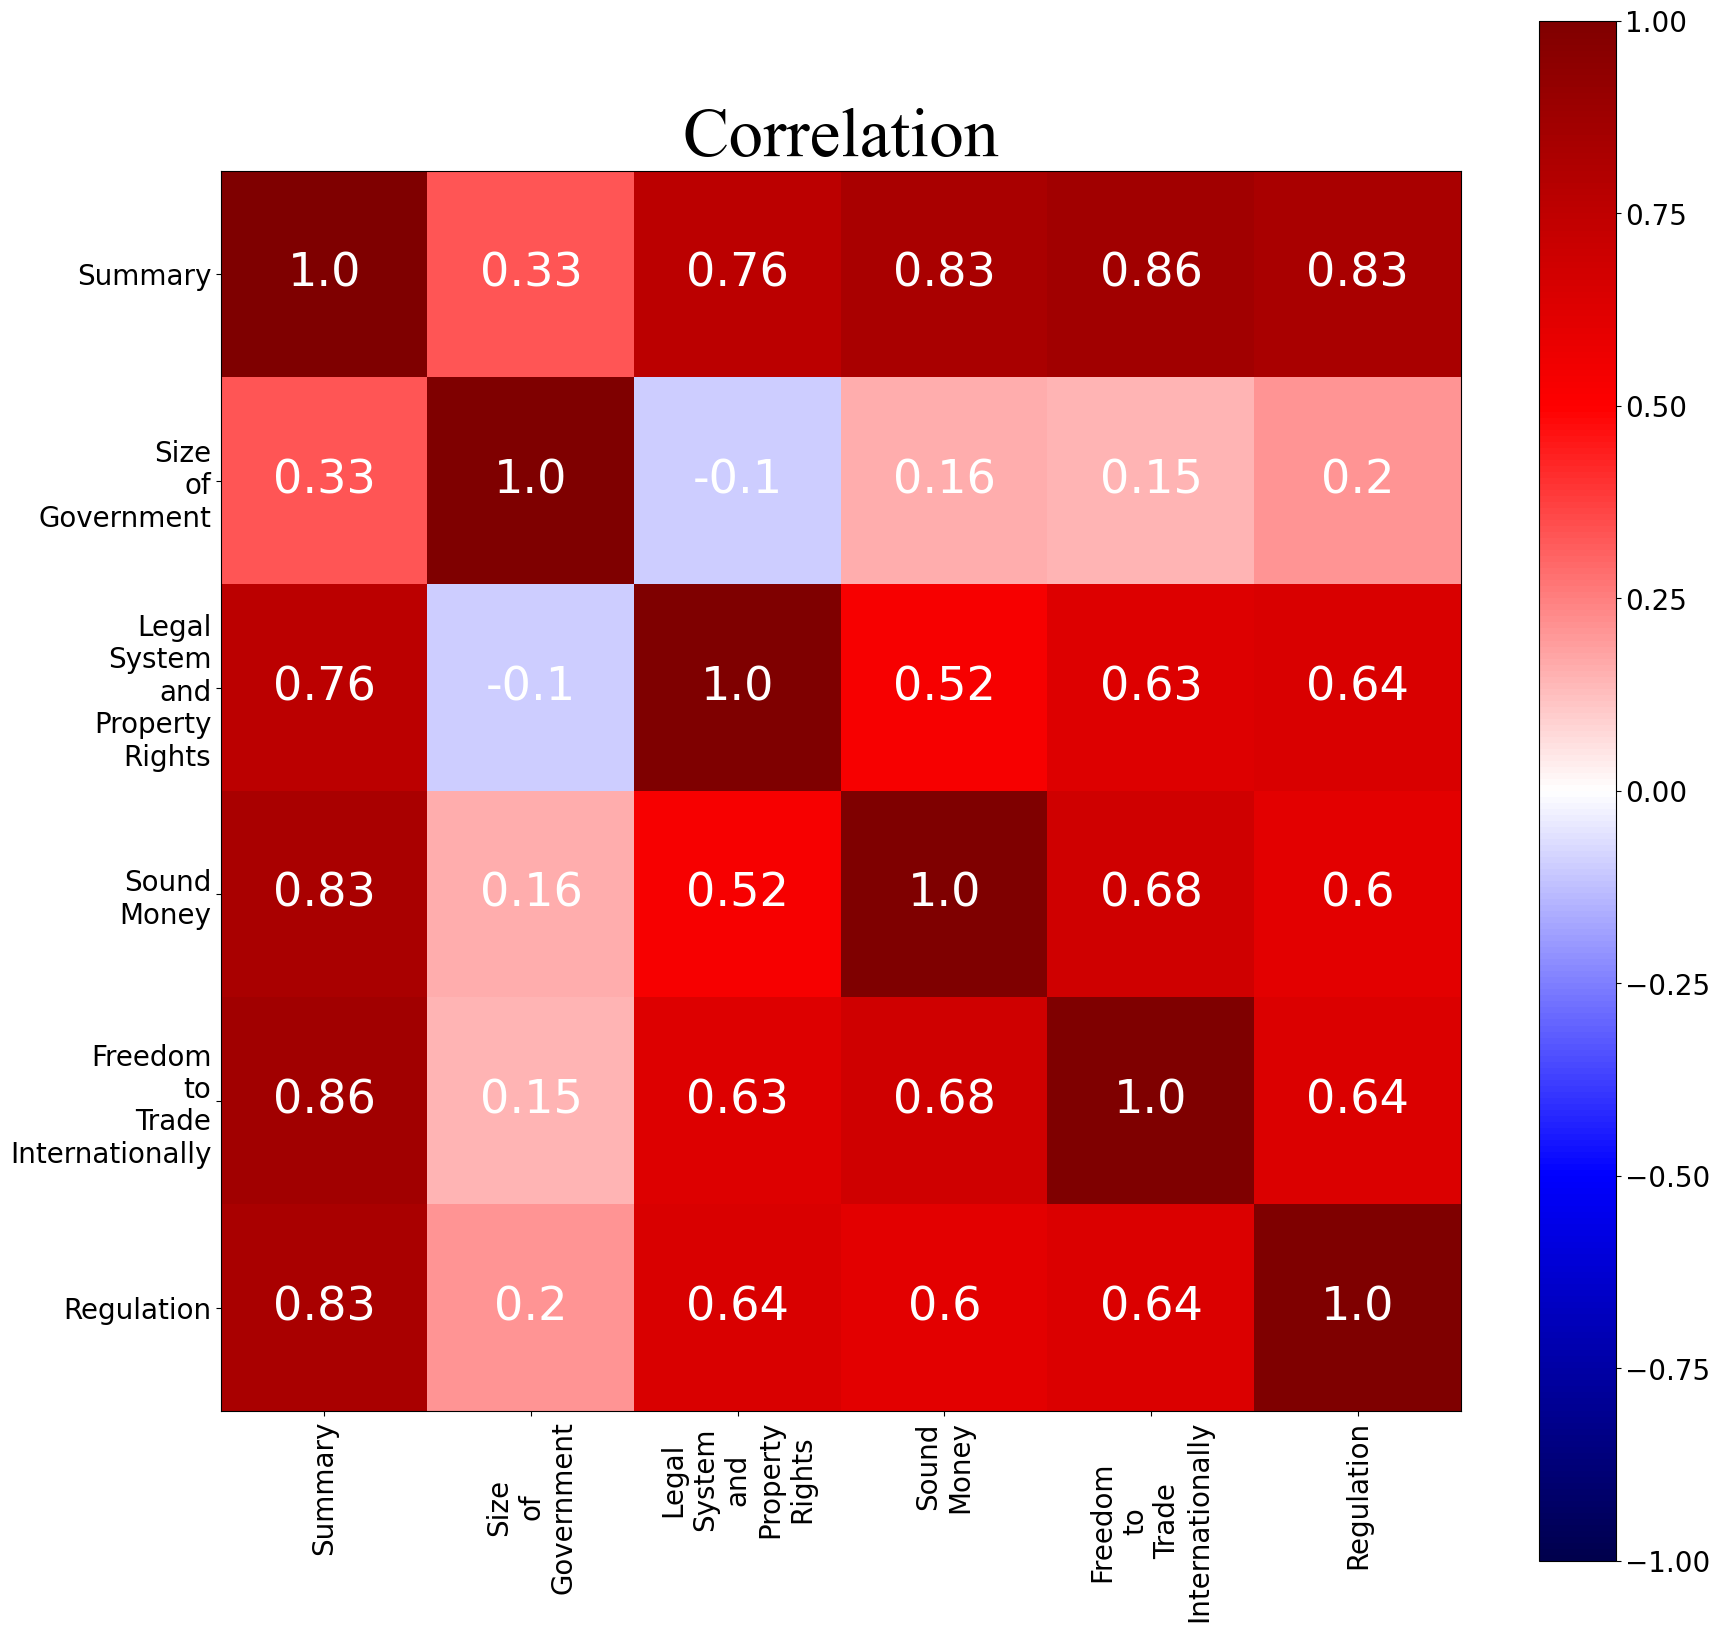

In [44]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("All.pdf")

def corr_matrix_heatmap(data, dim = 20, pp = None):
        fig, ax = plt.subplots(figsize = (dim,dim))
        im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
        labels = data.keys()
        num_vars = len(labels)
        tick_labels = [label.replace(" ","\n") for label in labels]
        tick_font_size = 120 / num_vars
        val_font_size = 200 / num_vars
        plt.rcParams.update({'font.size': tick_font_size})
        xticks = np.arange(num_vars)
        plt.xticks(xticks, tick_labels, fontsize = tick_font_size, rotation=90)
        yticks = np.arange(num_vars)
        plt.yticks(yticks, tick_labels, fontsize = tick_font_size)
        # put all options choses above into use and create figure
        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(i,j, str(round(data.values[i][j], 2)),
                              fontsize = val_font_size, ha = "center",
                               va = "center", color = "w")
        title_font = {"fontname":"Times New Roman"}  
        plt.title("Correlation", fontsize = 50, **title_font)   
        cbar = fig.colorbar(im)
        plt.show()
        if pp != None:
            pp.savefig(fig, bbox_inches="tight")
        
corr_data = data.corr()        
corr_matrix_heatmap(corr_data, pp = pp)

### Building scatter plots with time as x axis

In [45]:
mean_data = data.groupby("Year").mean()
mean_data

Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  5.699777            6.115453                          4.828106   
1975  5.330897            5.638449                          4.704443   
1980  5.358043            5.474844                          4.790720   
1985  5.423119            5.477523                          4.872785   
1990  5.716292            6.061804                          4.964320   
1995  6.163039            6.497296                          5.199571   
2000  6.592760            6.628378                          5.231726   
2001  6.599041            6.668608                          5.196628   
2002  6.663490            6.662246                          5.185988   
2003  6.681009            6.672367                          5.166744   
2004  6.710922            6.725984                          5.166447   
2005  6.736056            6.854917                          5.293075   
2006  6.780060            6.846312                          5.352180   
2007  6.810935            6.899178                          5.387801   
2008  6.769782            6.852975                          5.374990   
2009  6.774924            6.681671                          5.367239   
2010  6.809513            6.650865                          5.292711   
2011  6.812160            6.713350                          5.295417   
2012  6.823437            6.716821                          5.287927   
2013  6.820710            6.693263                          5.263555   
2014  6.869996            6.679071                          5.311640   
2015  6.868486            6.685504                          5.344179   
2016  6.872591            6.745947                          5.310897   
2017  6.840911            6.714026                          5.323041   
2018  6.888338            6.748693                          5.331769   
2019  6.893302            6.768514                          5.312195   
2020  6.749758            6.603613                          5.360975   

      Sound Money  Freedom to Trade Internationally  Regulation  
Year                                                             
1970     7.219435                          5.142756    5.643092  
1975     6.007796                          4.904180    5.600009  
1980     6.094311                          4.946113    5.661589  
1985     6.261684                          4.982920    5.687262  
1990     6.302771                          5.617330    5.816249  
1995     6.481726                          6.832335    6.085262  
2000     7.598053                          6.984603    6.559508  
2001     7.770338                          6.982832    6.394464  
2002     7.861788                          6.997352    6.621917  
2003     7.880149                          7.047378    6.649483  
2004     7.951051                          6.992921    6.722156  
2005     7.864794                          6.883771    6.782237  
2006     7.894100                          6.940902    6.864784  
2007     7.922043                          6.981182    6.866936  
2008     7.764033                          7.023490    6.834730  
2009     7.930318                          7.020073    6.878410  
2010     8.037720                          7.032564    7.021393  
2011     8.018281                          7.021954    7.037927  
2012     8.111376                          6.986931    7.030441  
2013     8.194170                          6.965516    6.994317  
2014     8.286492                          7.050601    7.018232  
2015     8.277932                          7.024002    7.006872  
2016     8.315198                          7.002284    6.986641  
2017     8.280965                          6.994231    6.892610  
2018     8.345674                          7.012747    7.005562  
2019     8.328343                          7.030791    7.029122  
2020     8.242351                          6.615388    6.927039

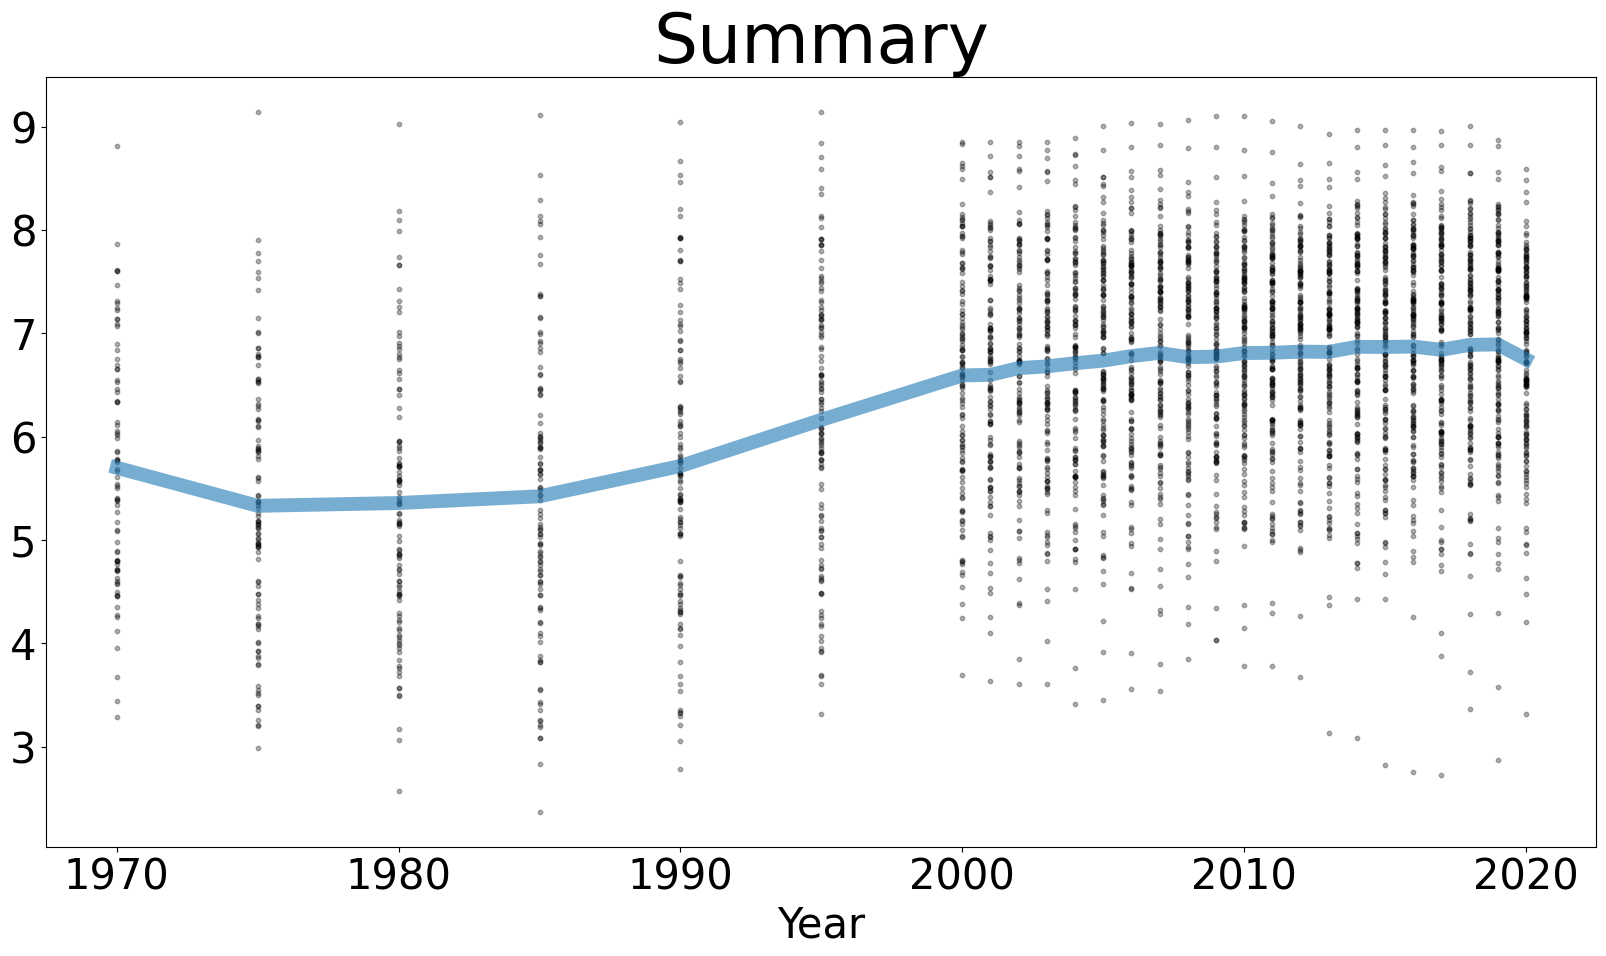

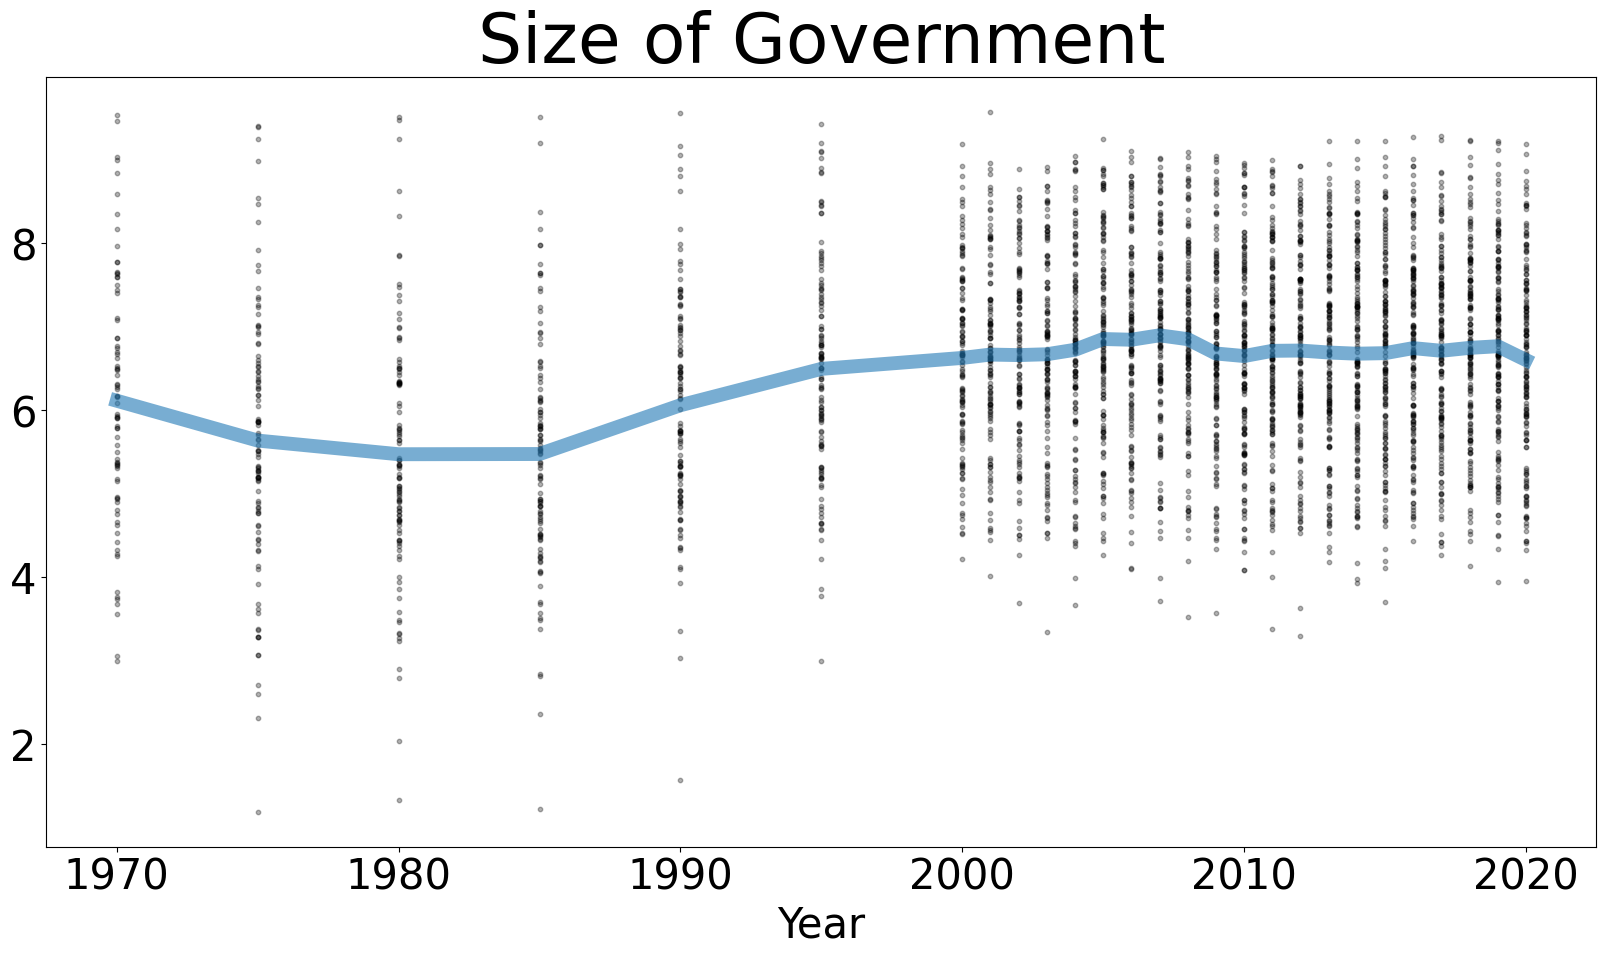

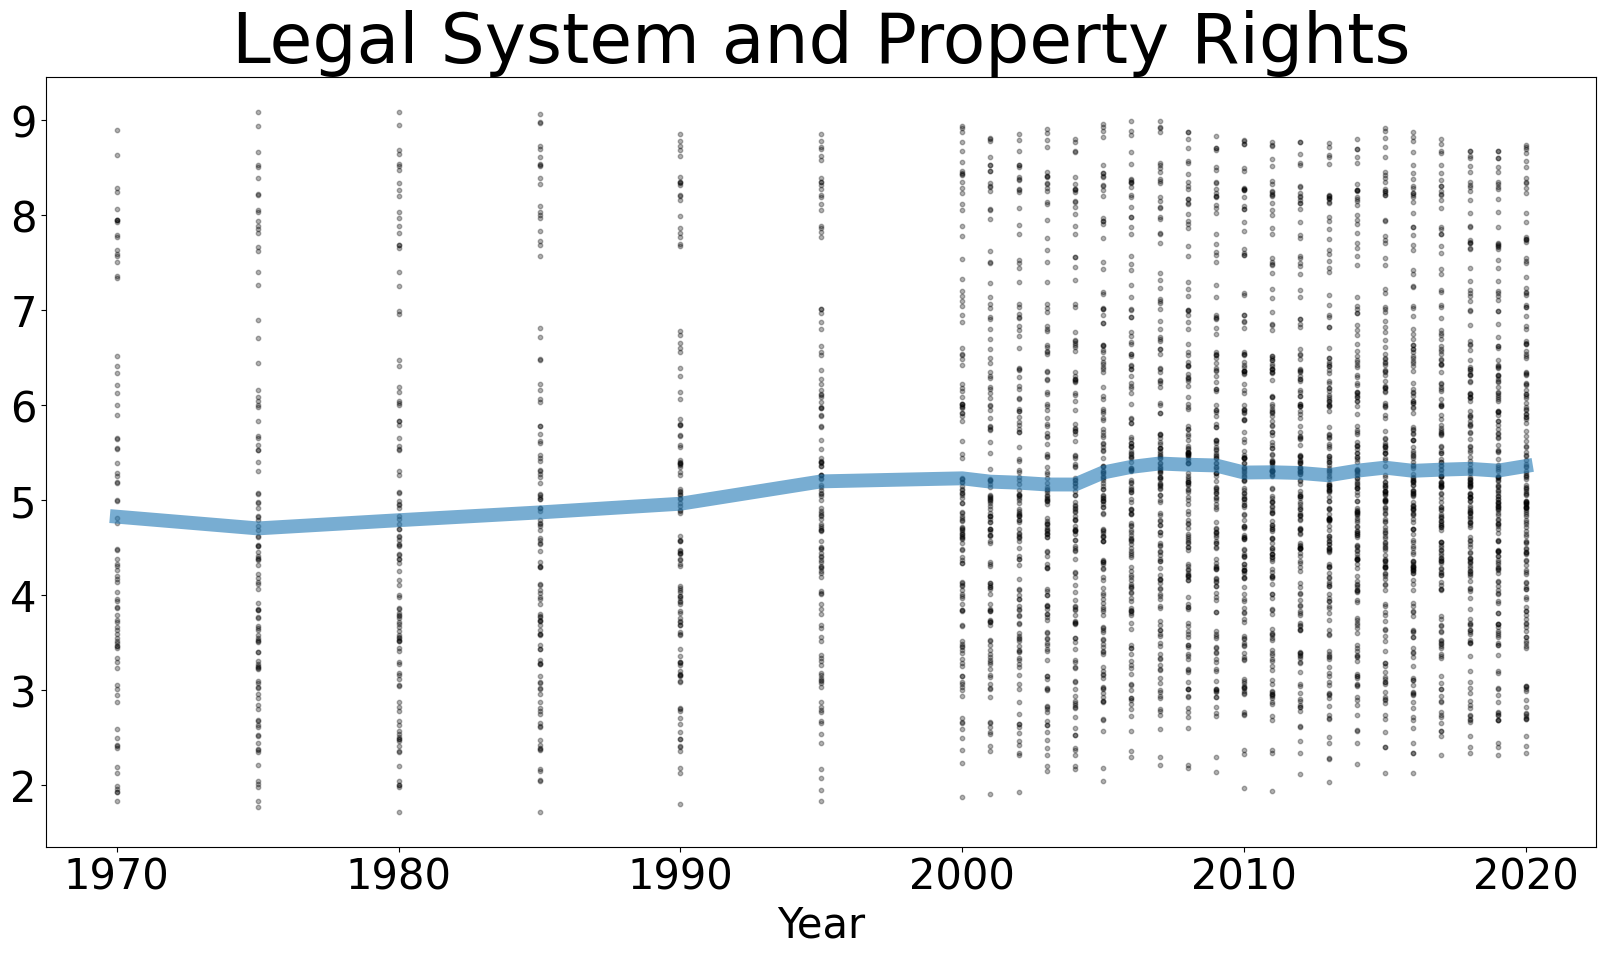

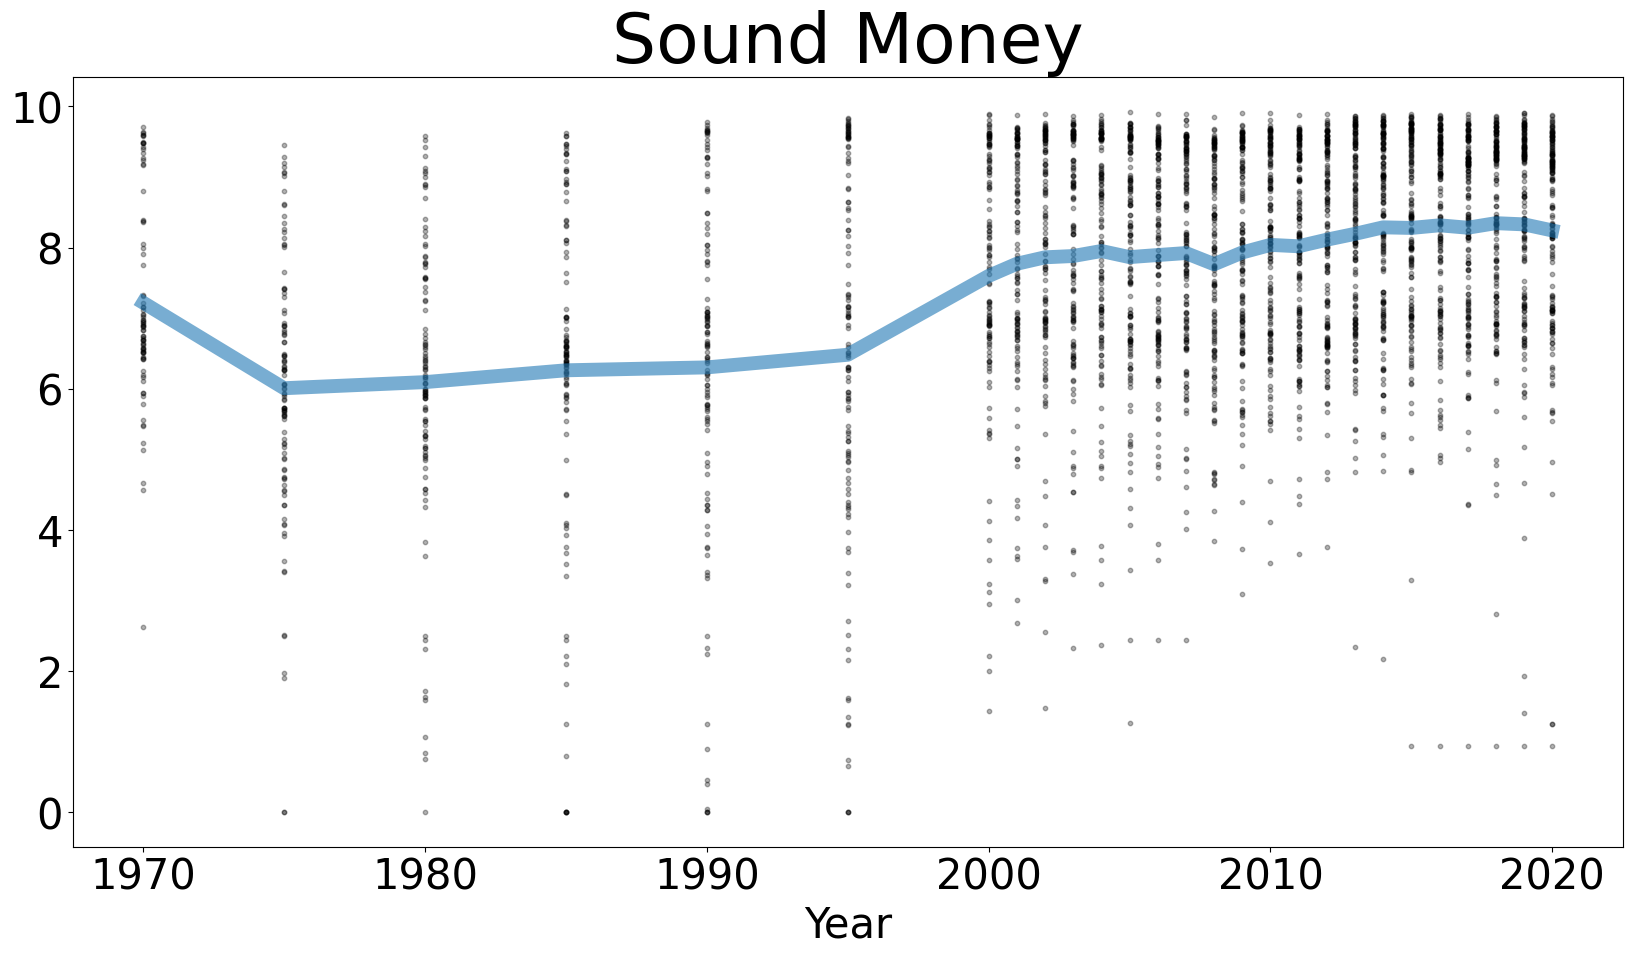

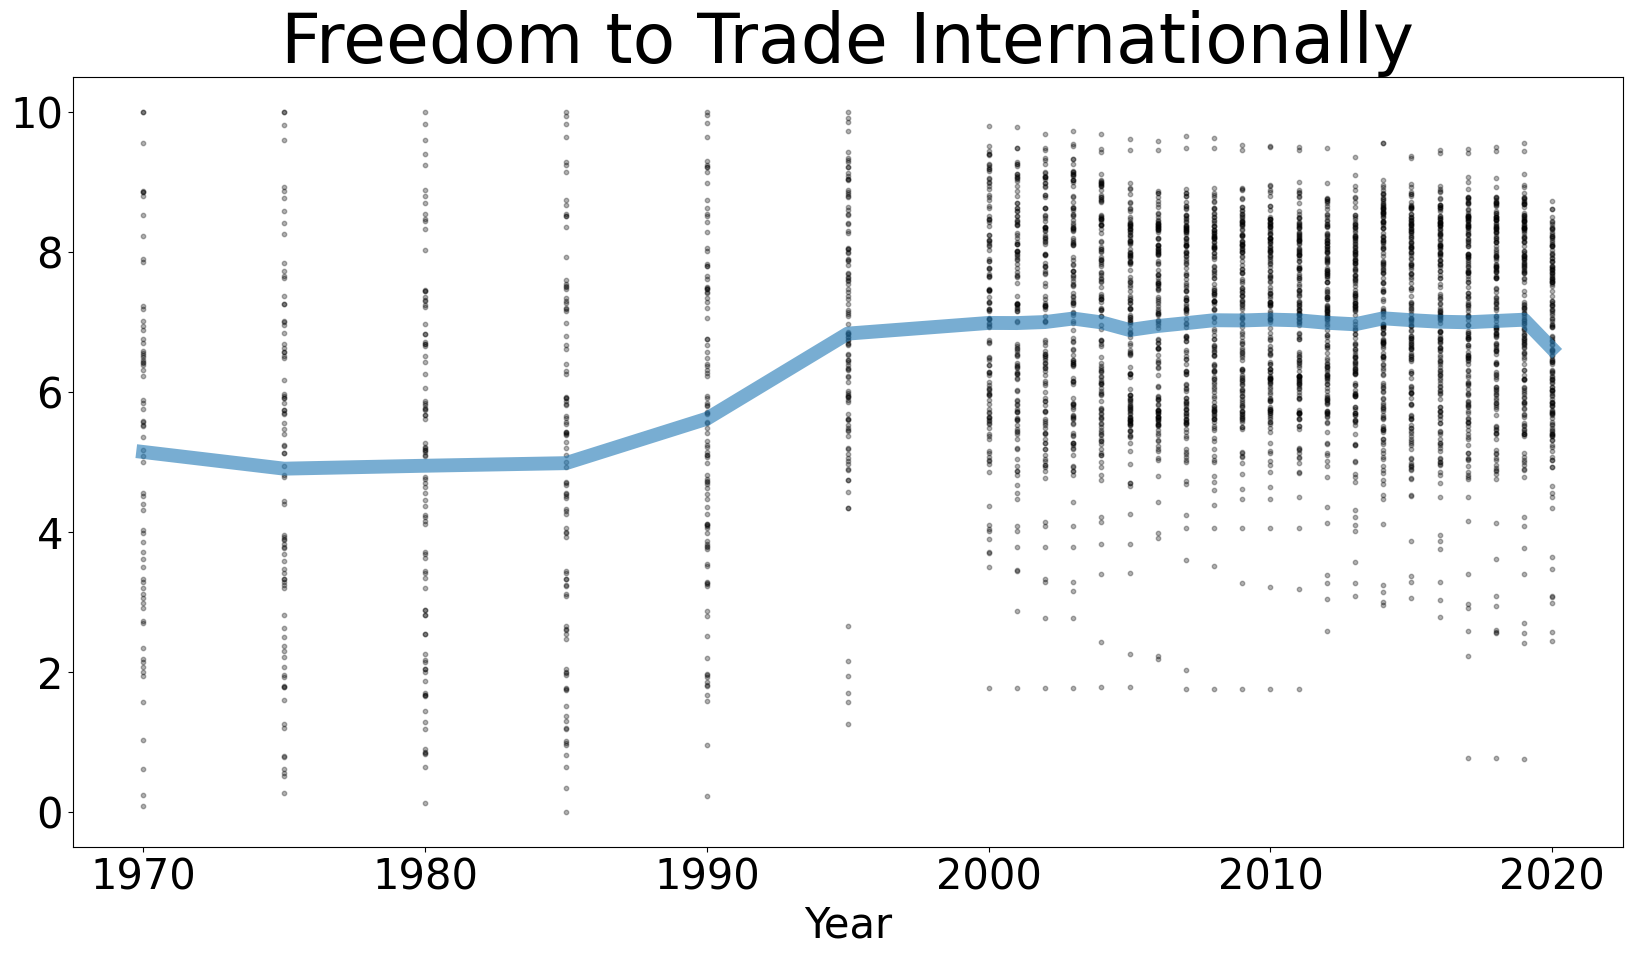

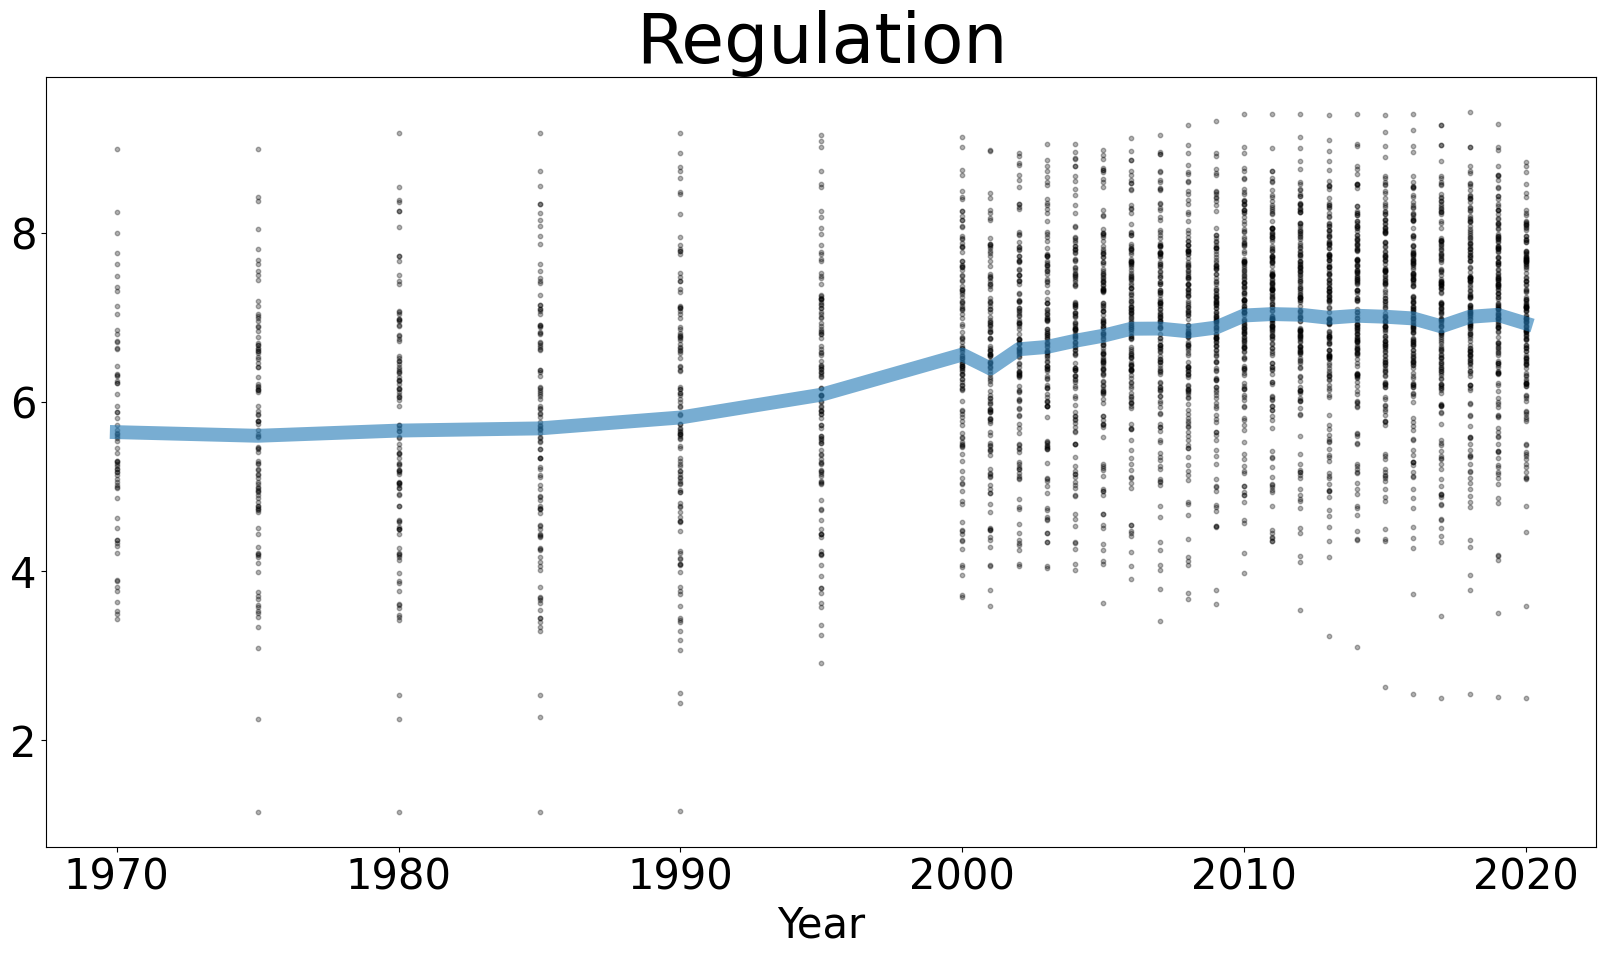

In [46]:
plt.rcParams.update({'font.size': 30})

def plot_ts_scatter(data, pp = None):
    for key, val in data.items():
        fig, ax = plt.subplots(figsize = (20,10))
        time = val.index.get_level_values("Year")
        ax.scatter(time, val, alpha = .3, color = "k", s = 10)
        ax.set_title(key, fontsize = 50)
        mean_data[key].plot(ax=ax, linewidth = 10, color = "C0", alpha = .6)
        plt.show()
        if pp != None:
            pp.savefig(fig, bbox_inches="tight")
        plt.close()
plot_ts_scatter(data, pp = pp)

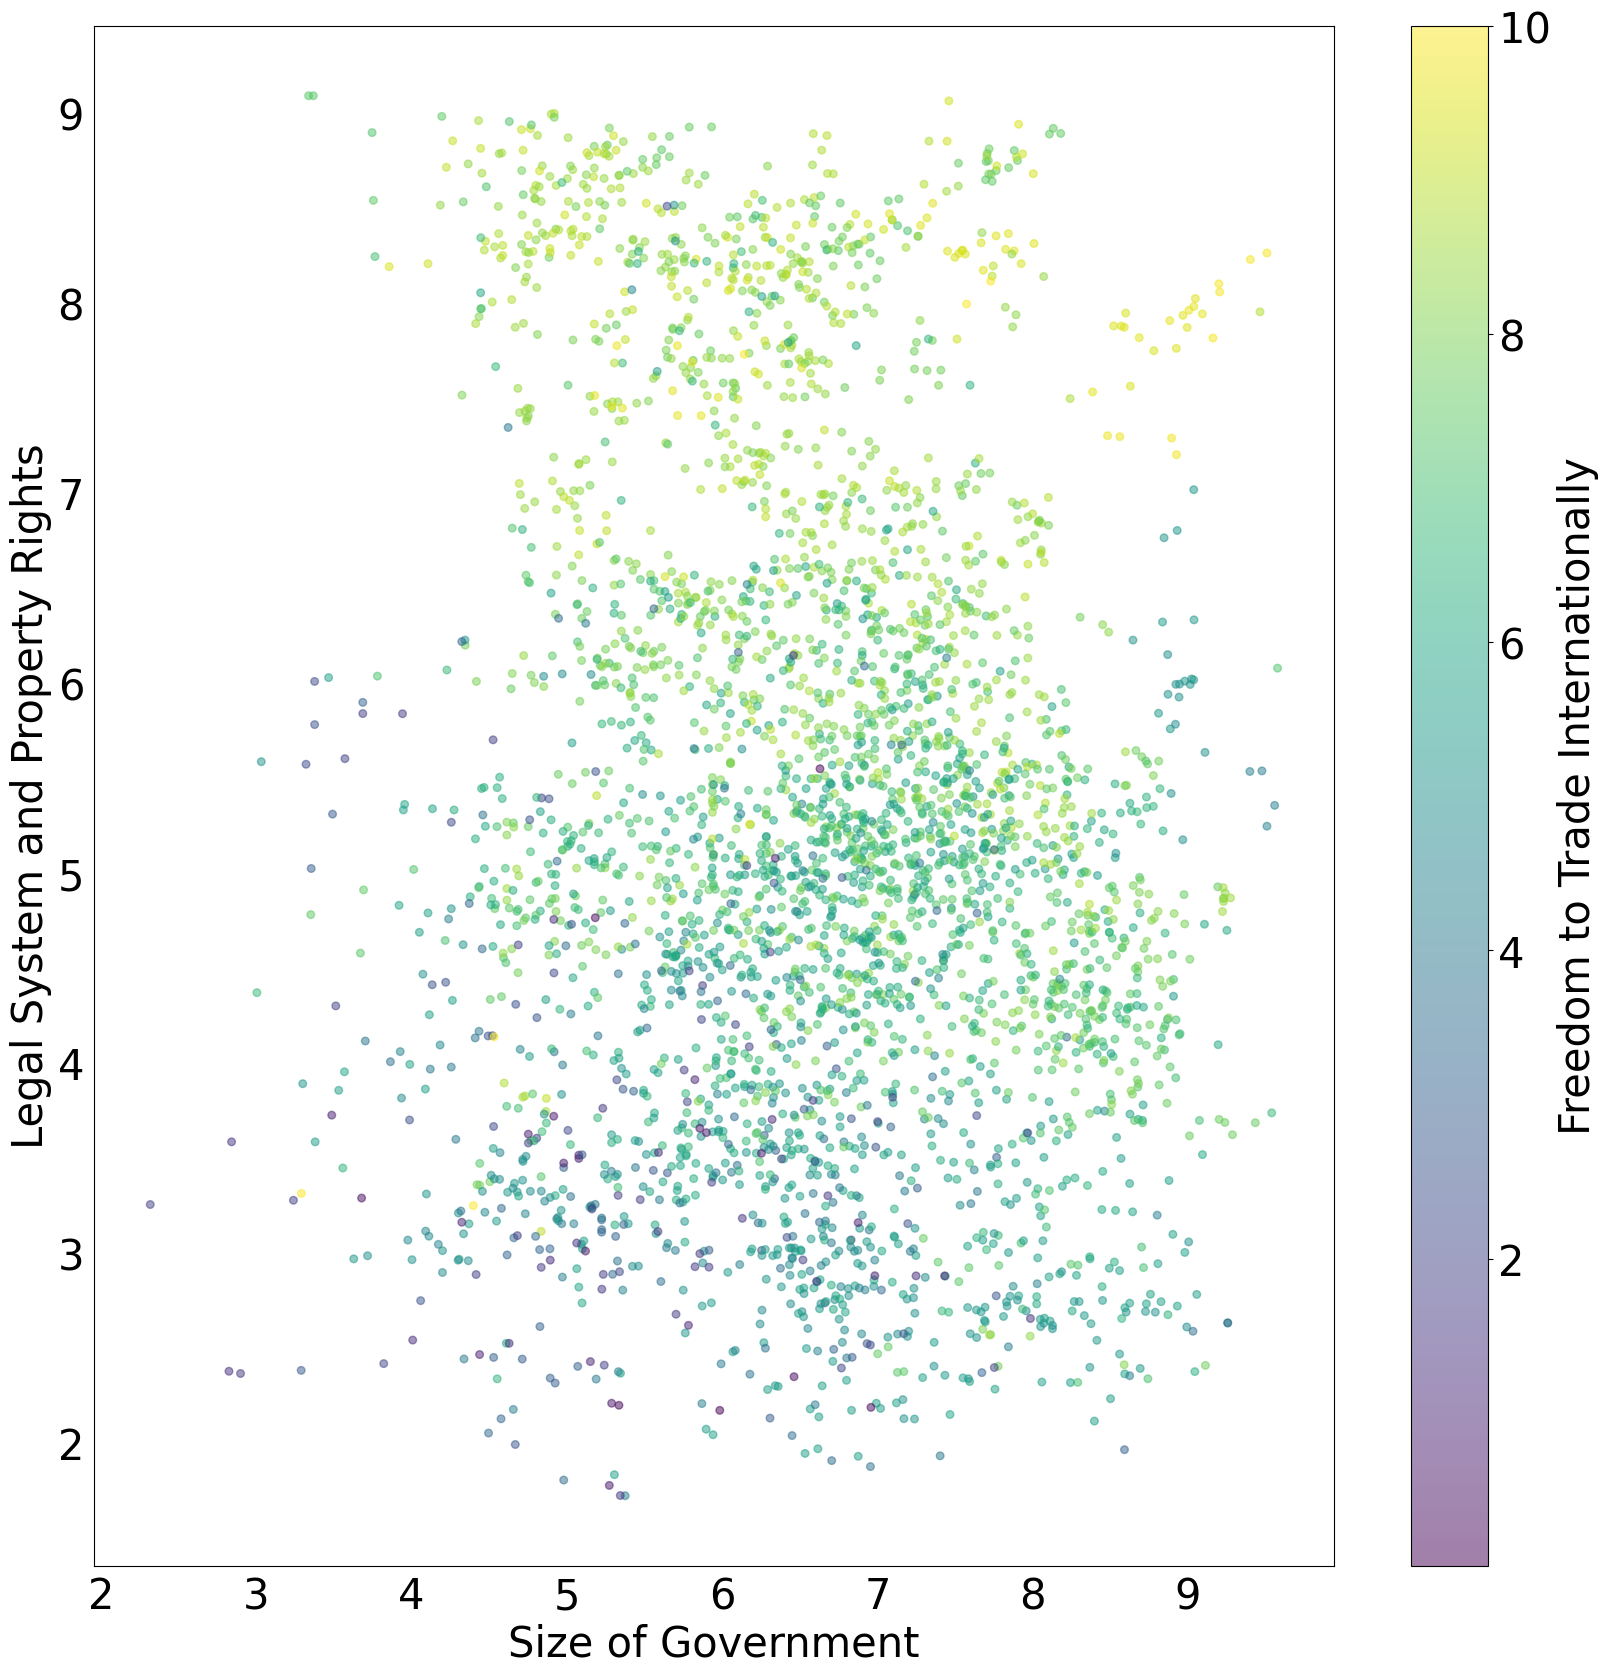

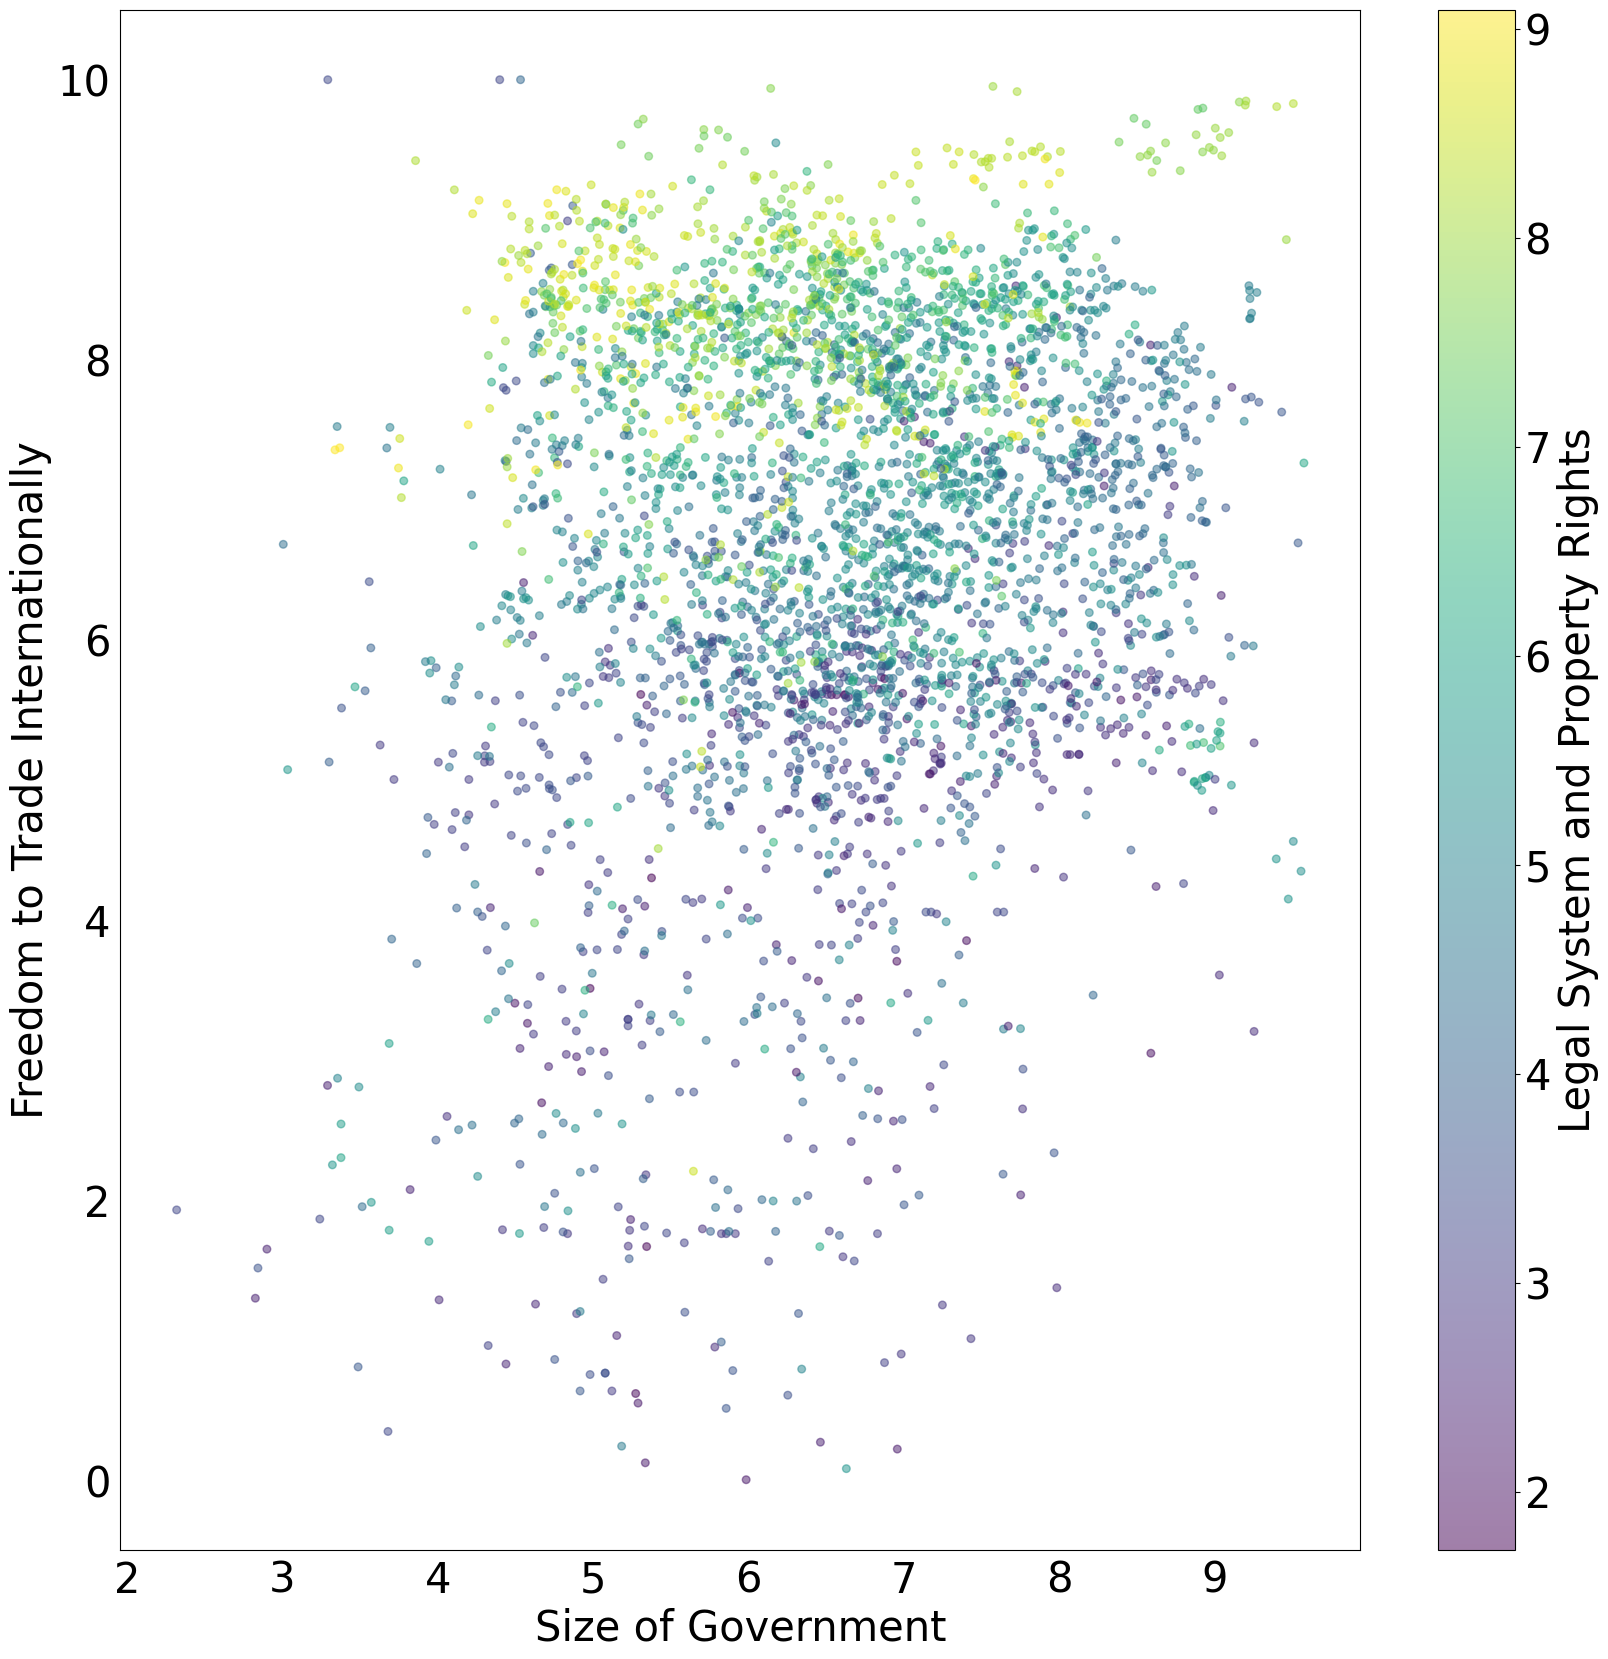

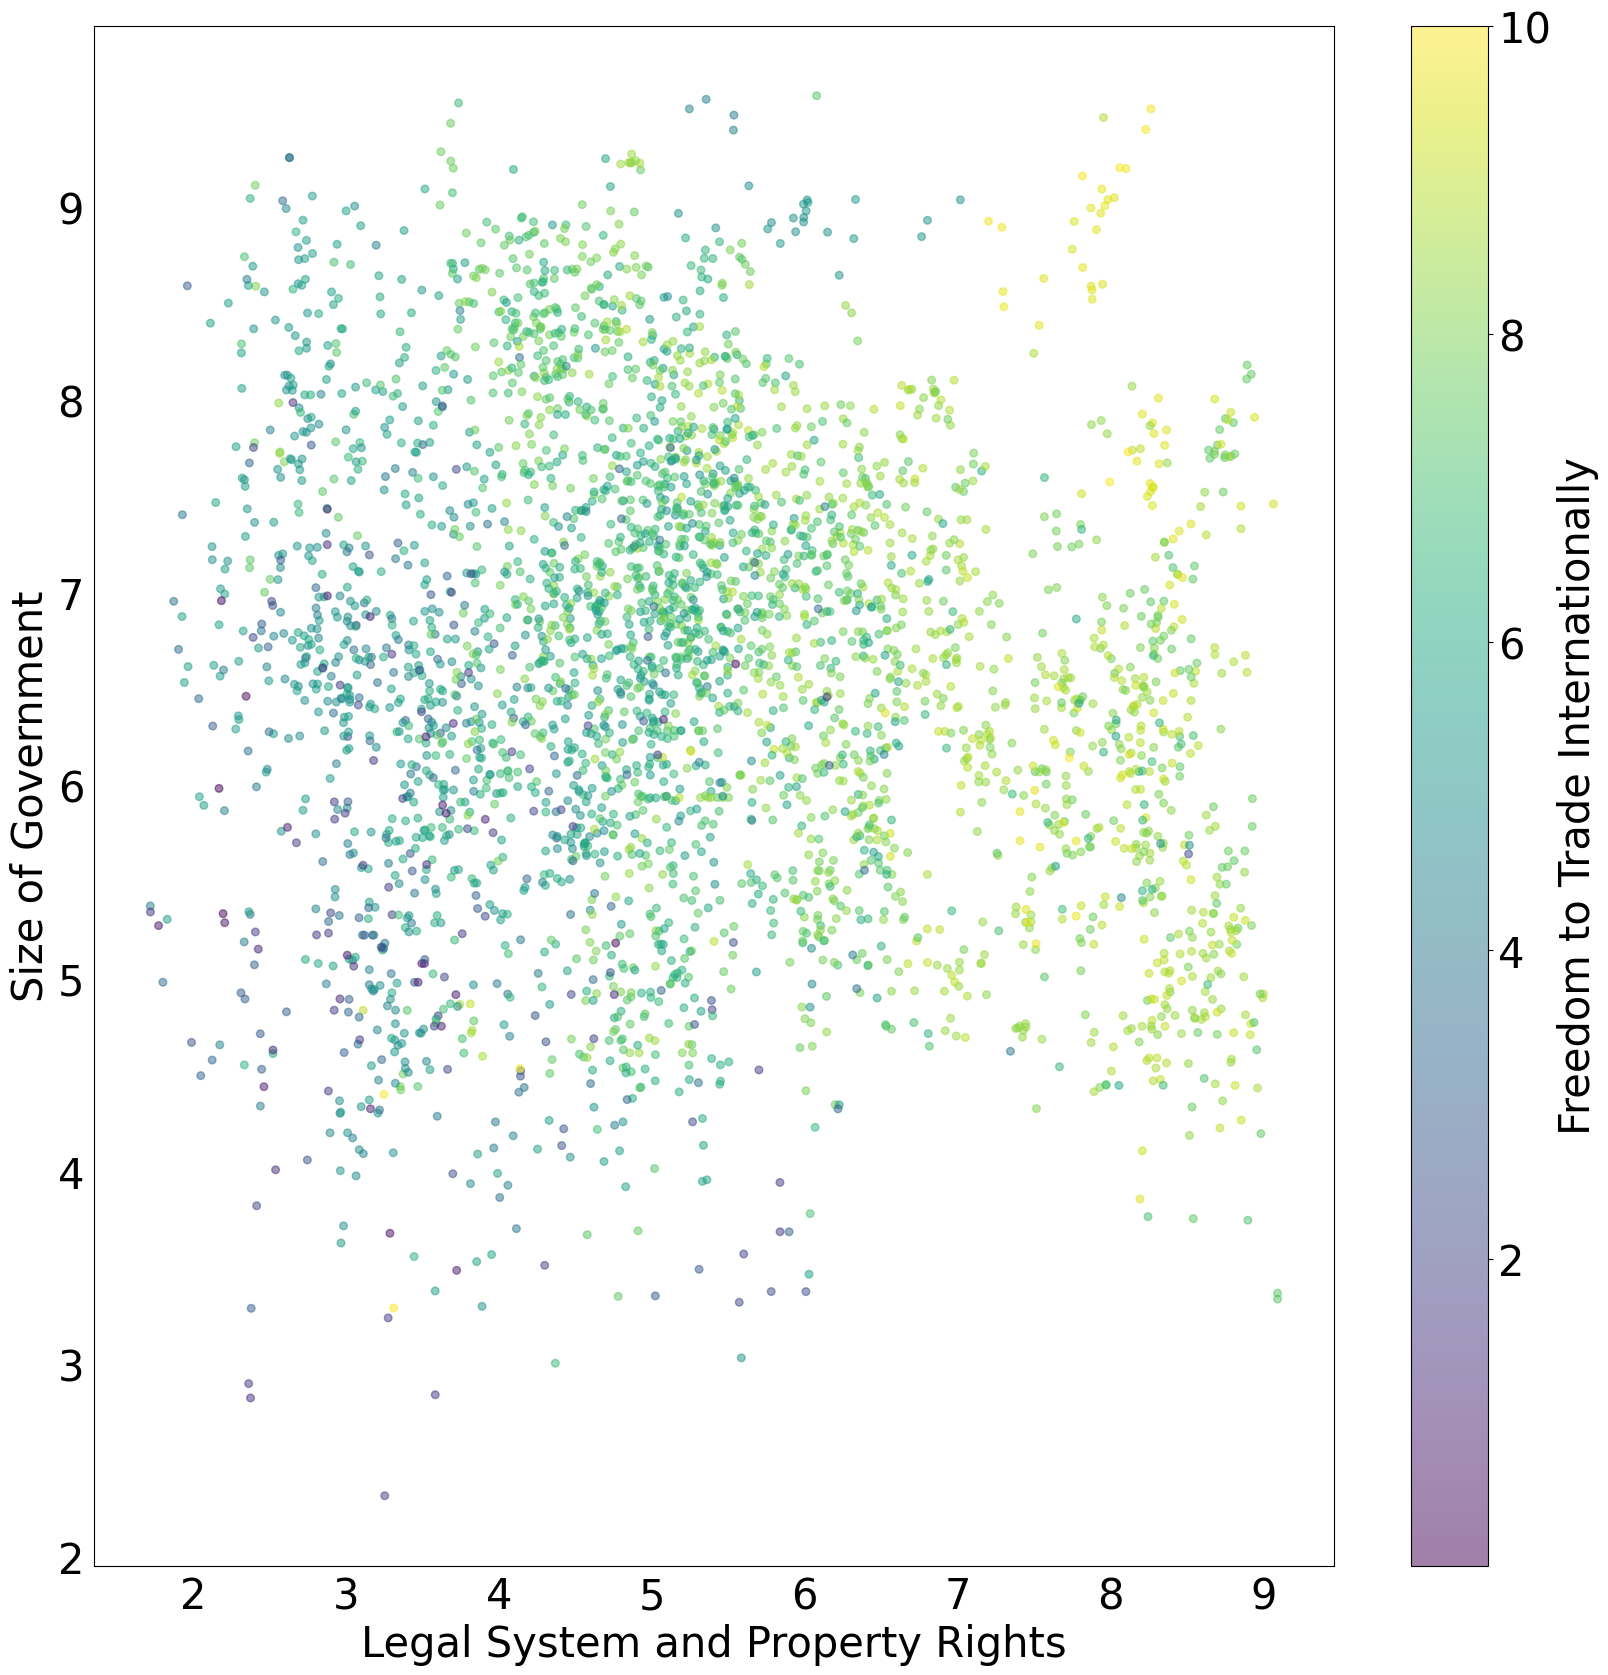

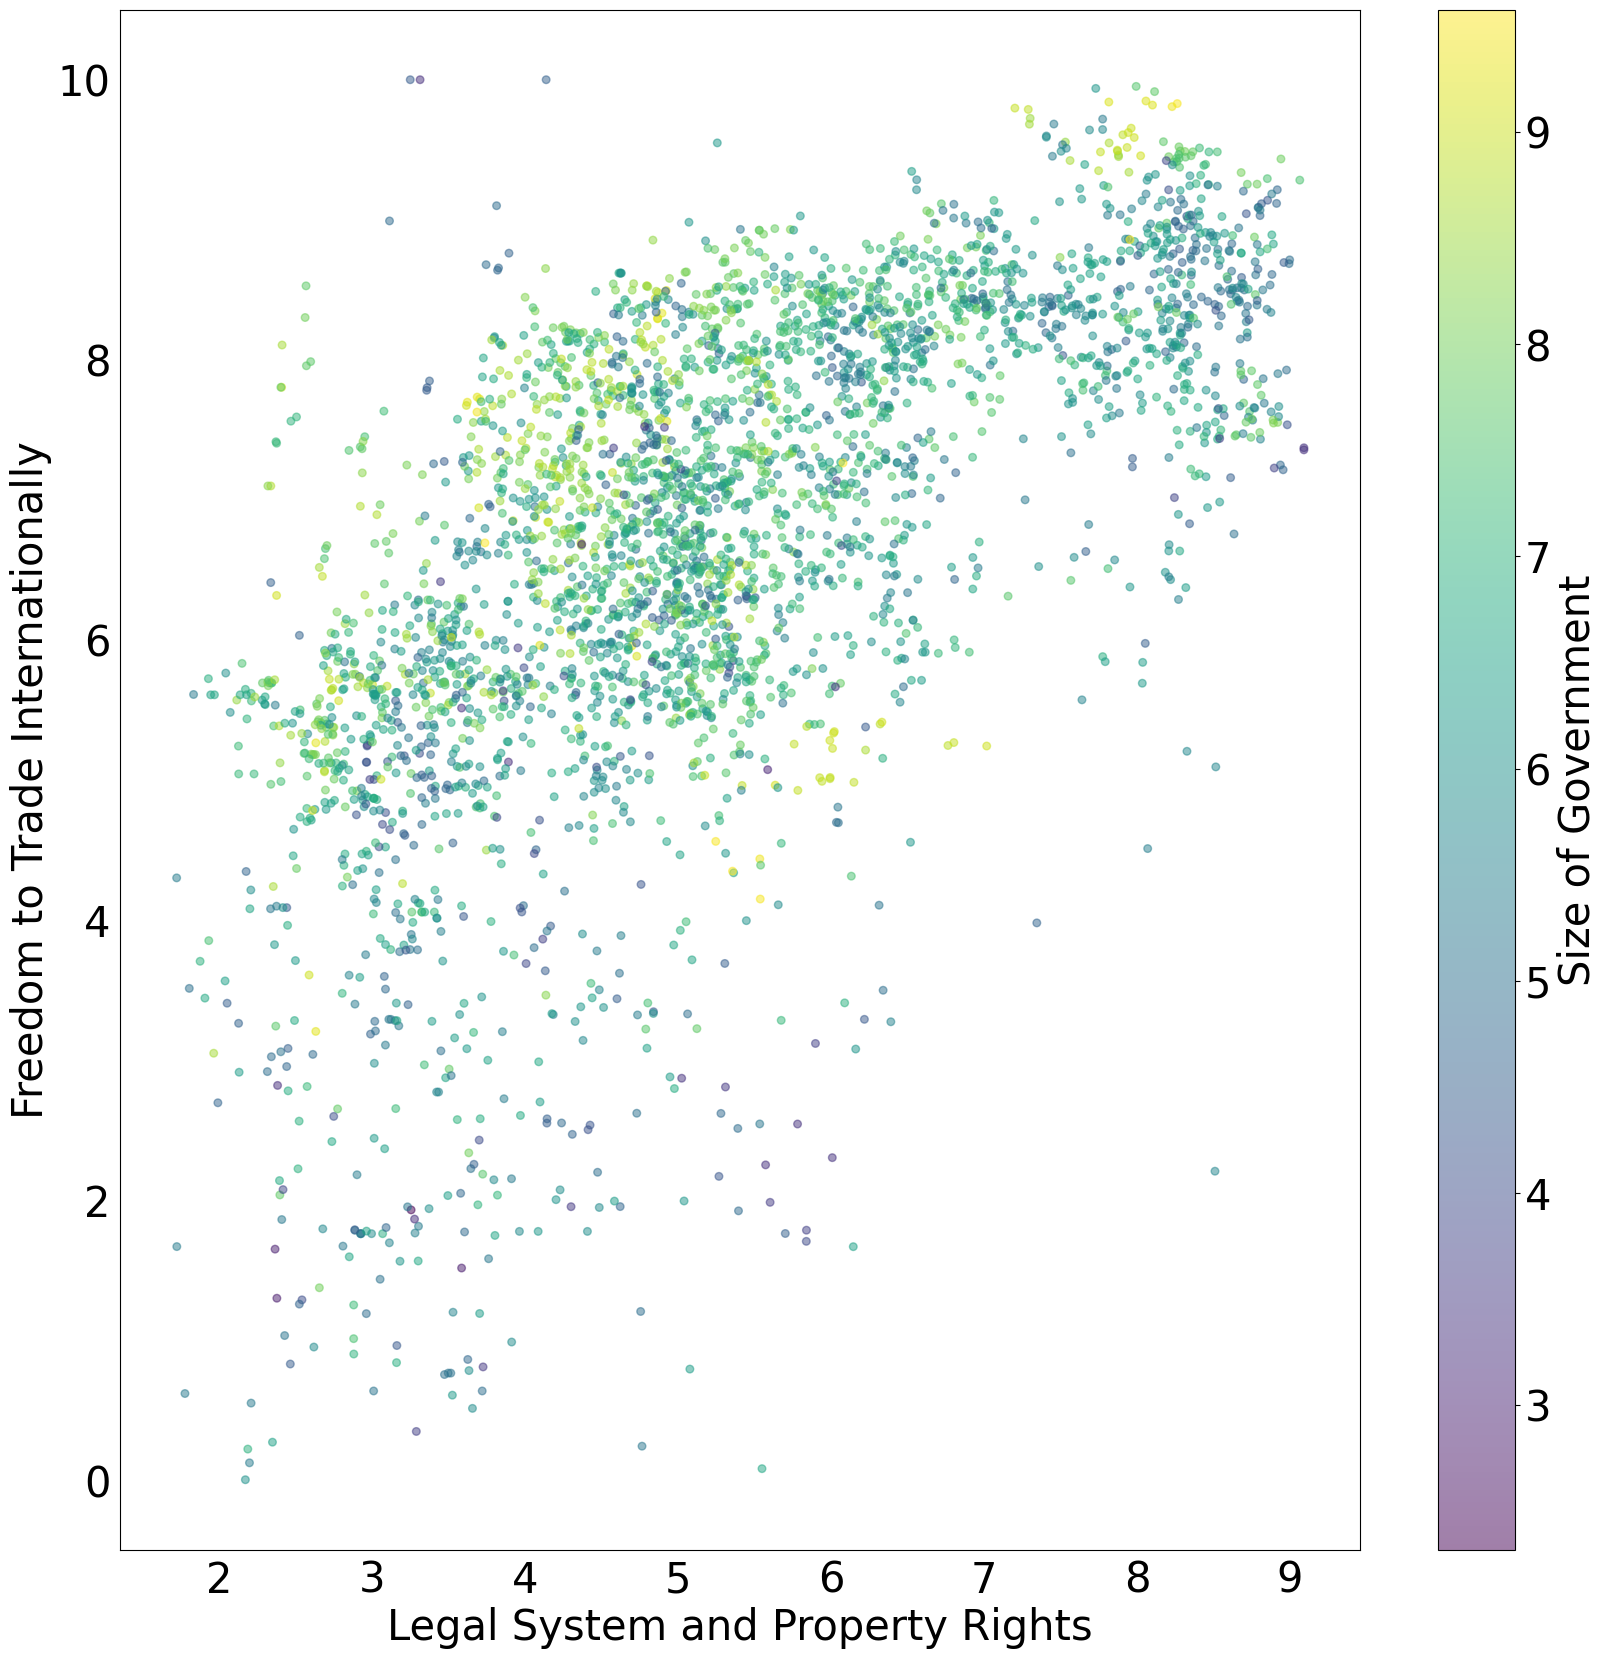

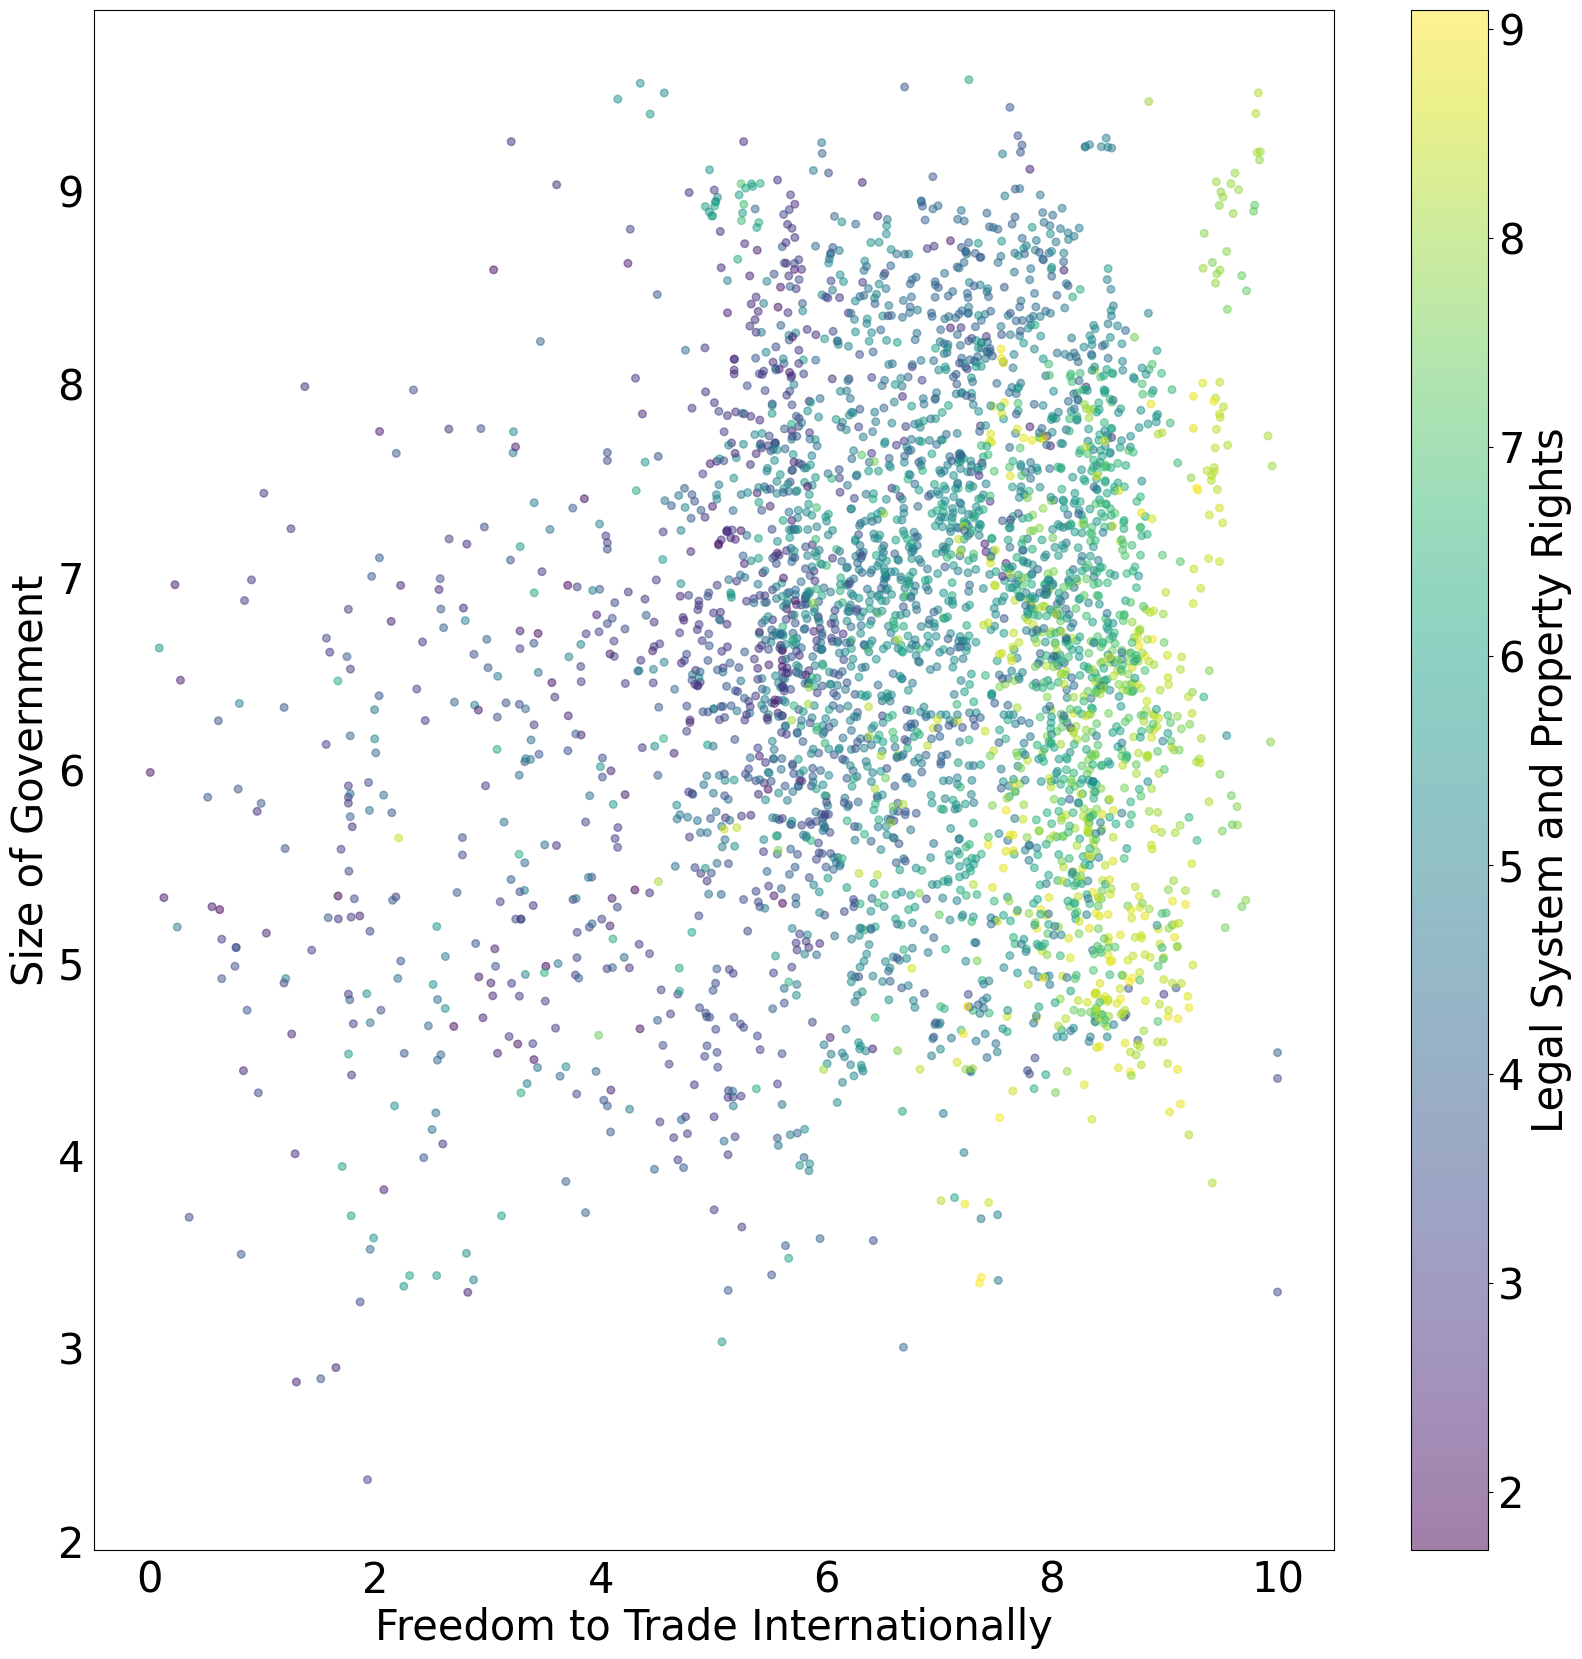

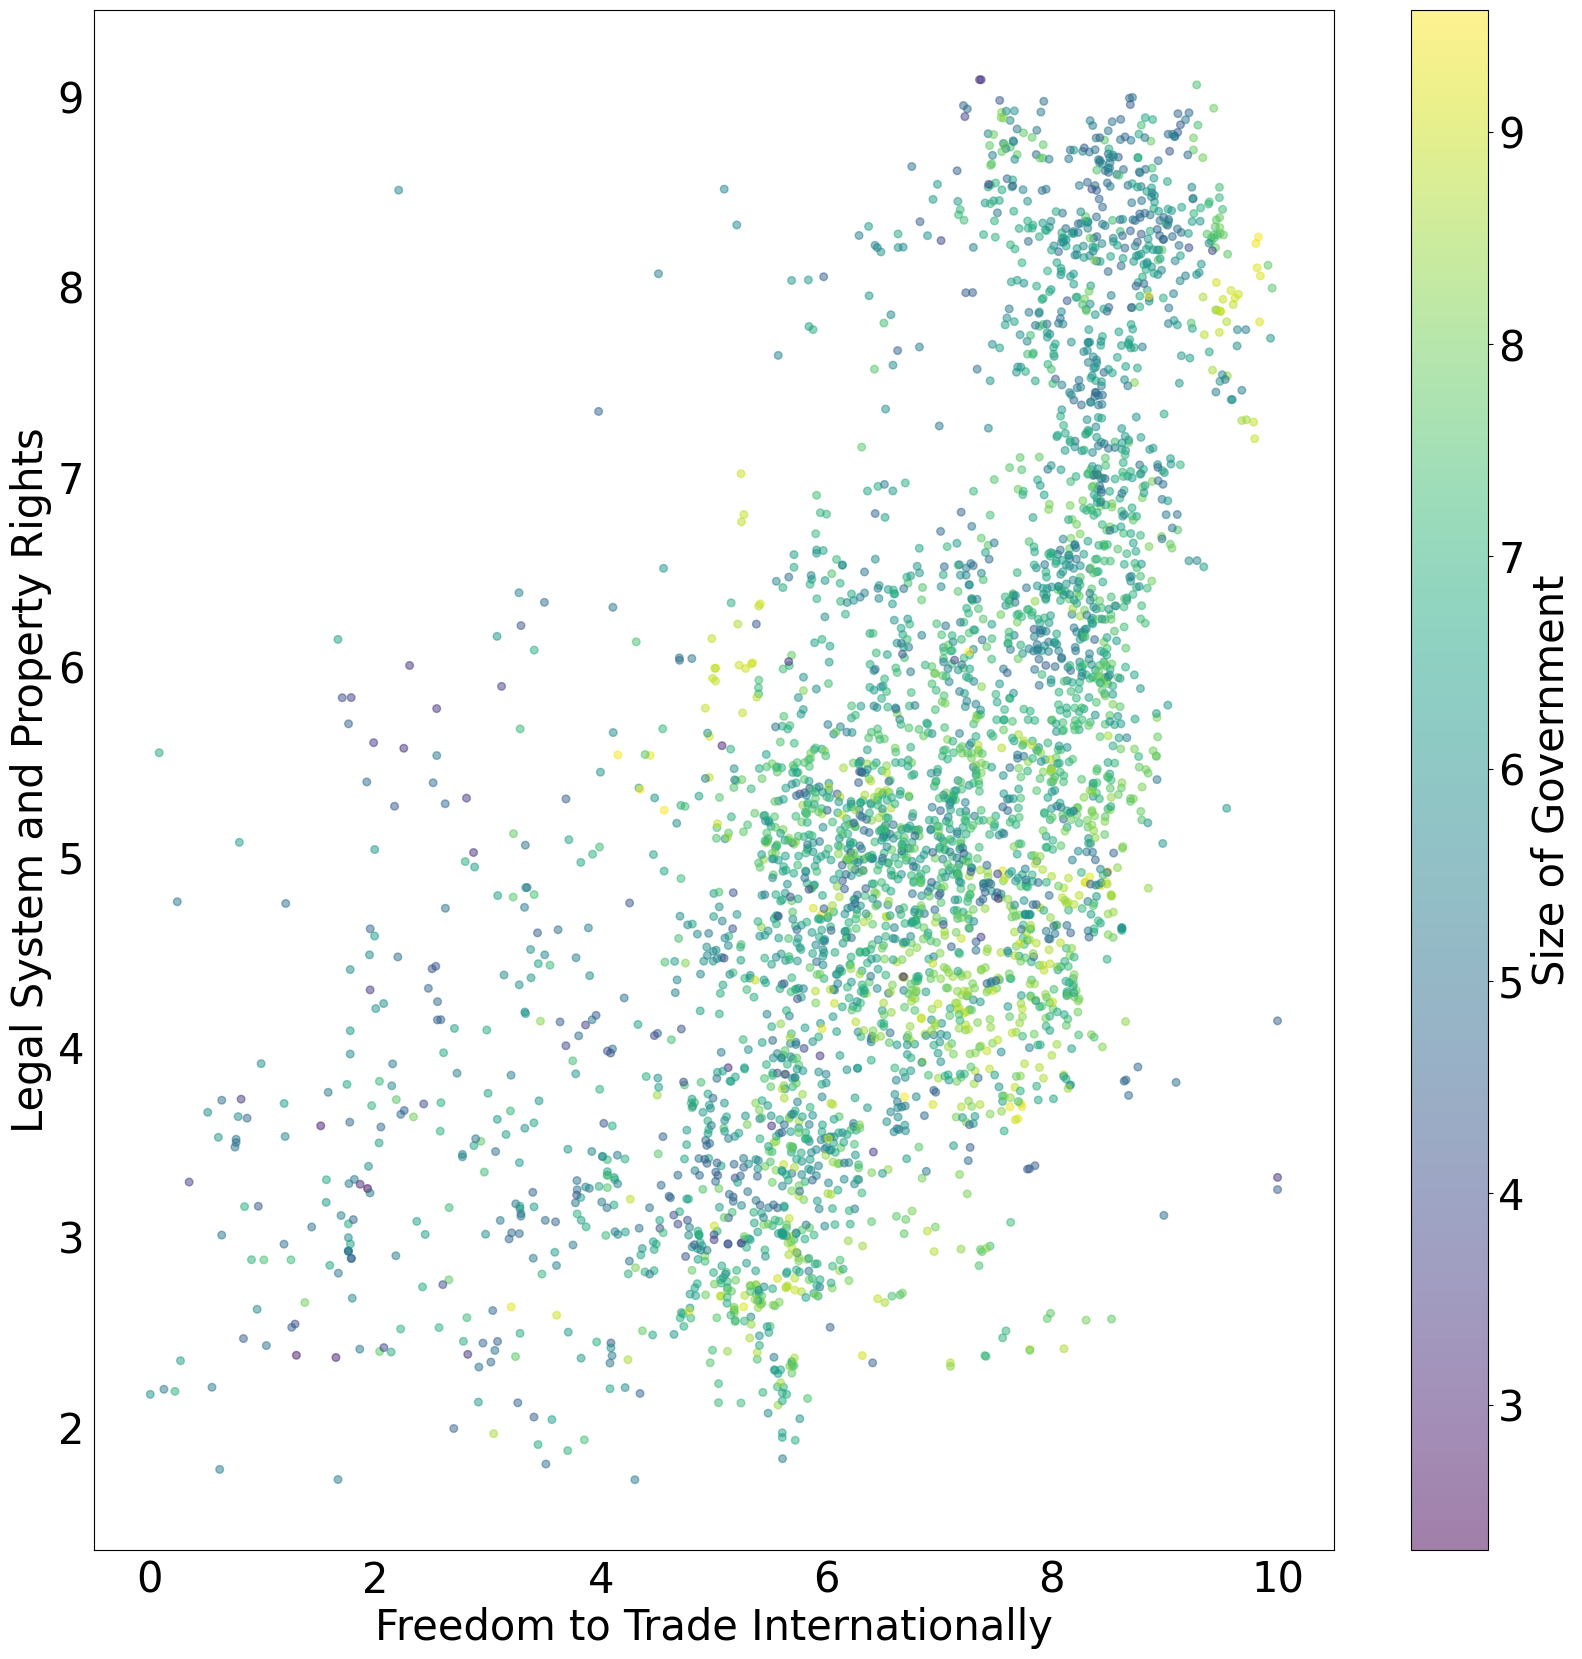

In [47]:
def color_dim_scatter(data, pp):
    for key1 in data:
        for key2 in data:
            #don't plot a var against itself
            if key1 != key2:
                for key3 in data:
                    #make sure all three are different
                    if key1!= key3 and key2 != key3:
                        fig, ax = plt.subplots(figsize = (20,20))
                        data.plot.scatter(x = key1, 
                                          y = key2,
                                          c = key3,
                                          colormap = "viridis",
                                          s = 30, 
                                          alpha = .5, 
                                          ax = ax)
                        #remove tick lines
                        plt.setp(ax.get_xticklines(), visible = False)  
                        plt.setp(ax.get_yticklines(), visible = False)
                        #show fig
                        plt.show()
                        #save fig
                        pp.savefig(fig, bbox_inches = "tight")
                        #close fig
                        plt.close()

color_dim_scatter(data[["Size of Government", "Legal System and Property Rights", "Freedom to Trade Internationally"]], pp)

C:\Users\hthog\AppData\Local\Temp\ipykernel_17444\3501991045.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data,


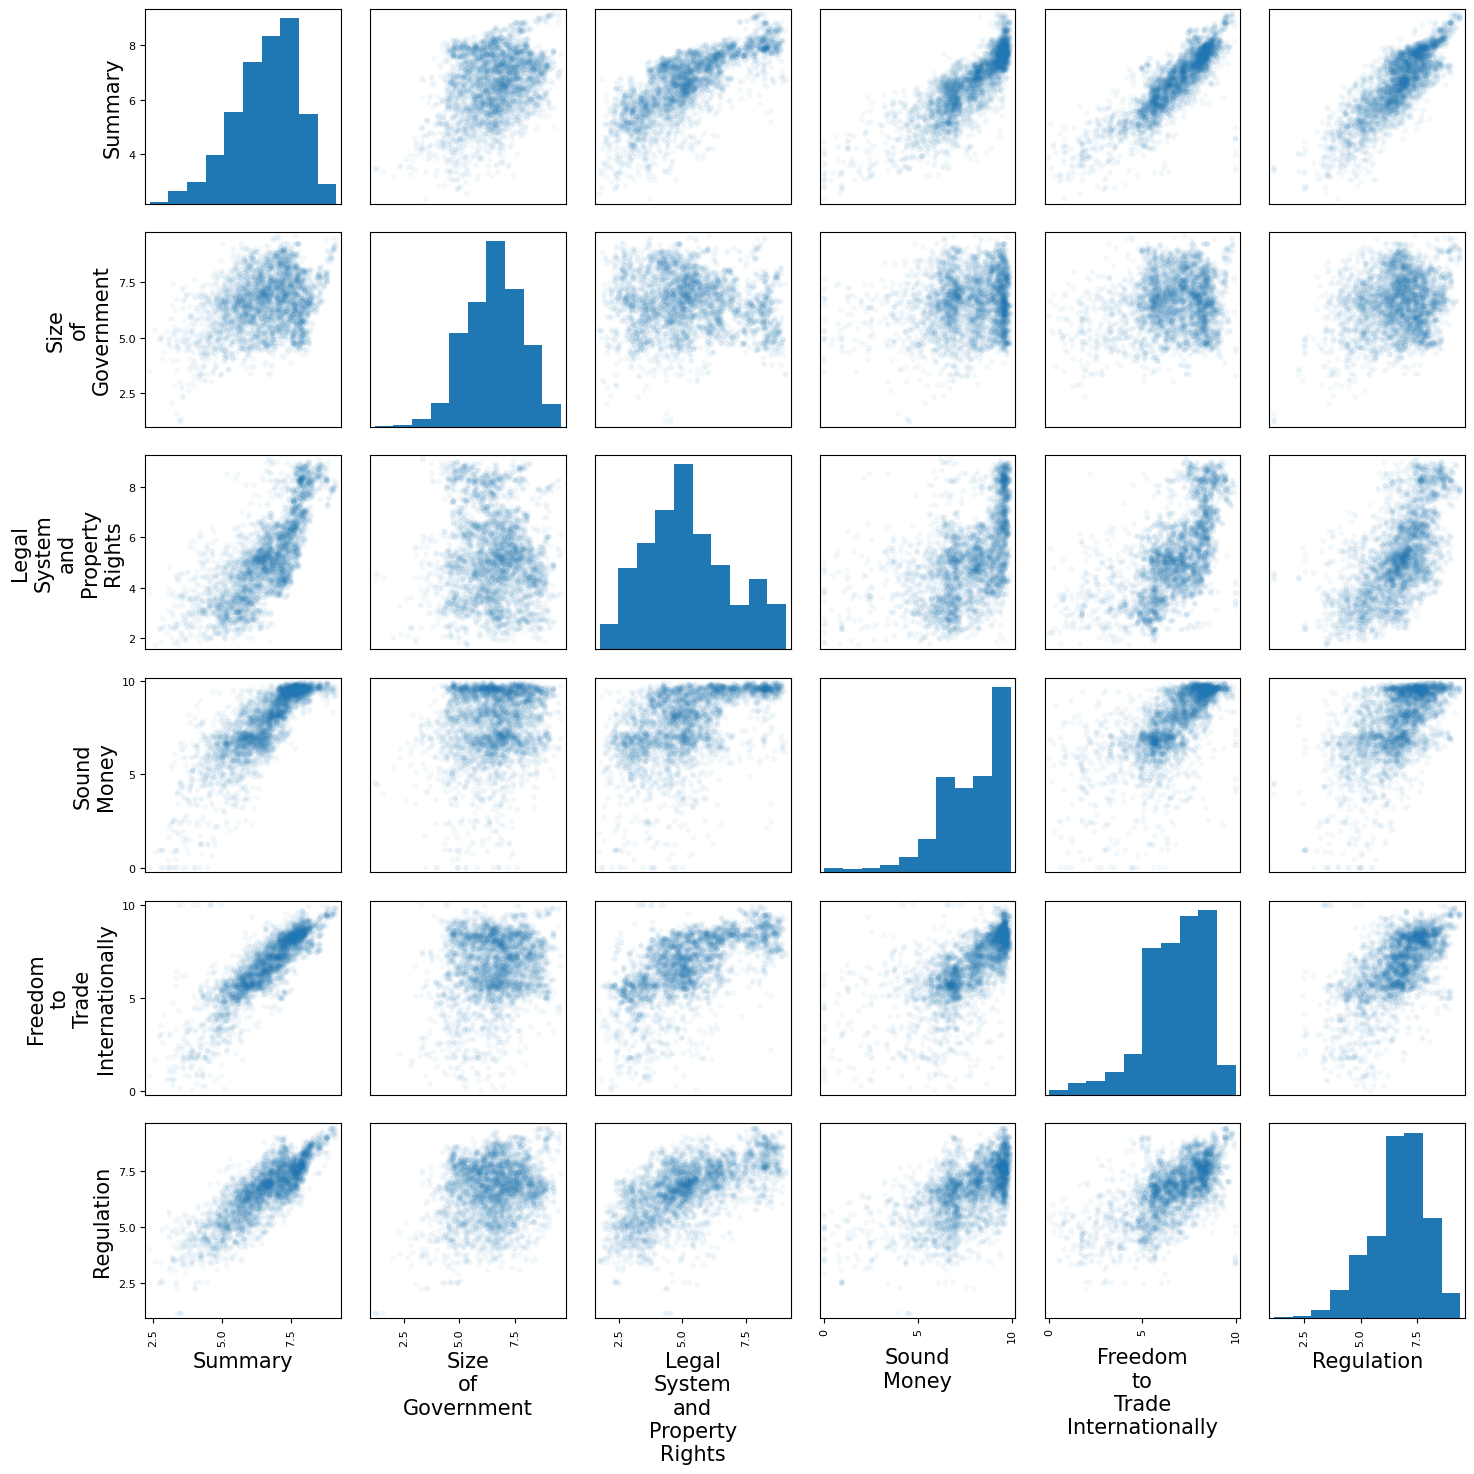

In [48]:
def formatted_scatter_matrix(data, pp = None, dim = 15):
    figsize = (dim,dim)
    fig, ax = plt.subplots(figsize = figsize)
    num_vars = len(data.keys())
    fontsize = 90 / num_vars
    plt.rcParams.update({'font.size' : fontsize})
    pd.plotting.scatter_matrix(data, 
                               alpha = .05, 
                               ax = ax, 
                               s = 400 / num_vars)
    plt.tight_layout()
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")

# replace each space with a new line
plot_data = data.rename(
    columns = {key:key.replace(" ", "\n") for key in data.keys()})
formatted_scatter_matrix(plot_data, pp = pp)

pp.close()